## Machine Learning in Finance
## Group Project
* This is a group project due on 08/01/2026
* Groups should have 3-5 members each.
* All projects should be completed using Jupyter notebooks which will be delivered at the end of the project. Each task should have an independent jupyter notebook, to assist in the grading.
* Please read the instructions as you also need to deliver a video.

### Project Context
Home Credit is a financial services company that provides loans to customers often underserved by traditional banking institutions. The goal is to use machine learning to assess the risk of default at the loan application stage, enabling better decision-making and optimized loan offerings. Understanding which customers are likely to default is crucial for reducing financial losses and improving operational efficiency.
### Project data
You have access to the Home Credit Default Risk dataset, along with a data dictionary to help you understand the column titles. However, you will need to explore the data yourself—not all columns will be useful, and some may require significant preprocessing. Your tasks will include:
* Cleaning the data (e.g., handling null values, resolving data type issues, addressing outliers).
* Dealing with categorical variables and feature engineering.
* Exploring which features are useful for predictive tasks and avoiding features that may leak data.
### Computation
Dealing with computation constraints is a big part of machine learning, especially as we start to deal with real world data. If at any point you are trying to run an algorithm or approach that is taking a long time to solve on google colab you have a couple of options:
* You can try running it on your laptop directly, in case your laptop or computer is faster.
* You can try to reduce the complexity of the model.
* You can reduce the complexity of the data by reducing the number of columns you use at a time.
* You can just take a smaller sample of the data (less rows) and apply the algorithm / model to this.

#### Grading
* Important you will mostly be graded on your ability to apply the machine learning approaches we have learned in class properly. So please include the work that you test and not just the final best model.
* You might receive extra points for demonstrating the ability to apply approaches not covered in the class.
* What your final model is (and how well it performs) matters much less than your ability to correctly apply different approaches, explore the problem, and understand the final results and model. Please try to demonstrate in the notebooks and the video.
* Well organized Jupyter notebooks and code will help ensure that your intentions are communicated and are likely to increase your 


**First: Please Provide your gorup members in this markdown cell**

1. 20221960 - Renato Bernardino
2. 20221899 - David Duarte


In [75]:
import pandas as pd

## Task 1 Data Cleaning and Exploration
#### A.	Explore and understand the data in the cells below.
* Use the data provided only.


In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('/home/renato/Documents/Mestrado/ML4Finance/Projeto Grupo/Group Project-20251220/project_data.csv')

print("Data loaded successfully!")
print(f"Shape: {data.shape}")
print(f"\nFirst few rows:")
data.head()

Data loaded successfully!
Shape: (158791, 95)

First few rows:


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      330409     0.0         Cash loans           F            Y   
1      421359     0.0    Revolving loans           M            N   
2      378826     0.0         Cash loans           F            N   
3      305942     0.0         Cash loans           F            N   
4      329908     0.0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          112500.0   1125000.0      33025.5   
1               Y             1          162000.0    270000.0      13500.0   
2               Y             0          157500.0    580500.0      49824.0   
3               Y             1          121500.0    280170.0      30303.0   
4               Y             0          135000.0    135000.0       6750.0   

   ...  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  \
0  ...             NaN                NaN                 NaN   
1  ...          0.0168                NaN                  No   
2  ...             NaN                NaN                 NaN   
3  ...             NaN                NaN                 NaN   
4  ...             NaN                NaN                 NaN   

  OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE  \
0                      0.0                      0.0                      0.0   
1                      1.0                      0.0                      1.0   
2                      0.0                      0.0                      0.0   
3                     13.0                      0.0                     13.0   
4                      1.0                      1.0                      1.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  MISSED  RECOVERED  
0                       0.0                  -603.0       0        NaN  
1                       0.0                  -933.0       0        NaN  
2                       0.0                  -211.0       0        NaN  
3                       0.0                 -1719.0       0        NaN  
4                       1.0                  -573.0       0        NaN  

[5 rows x 95 columns]

### A.1 Initial Data Inspection


In [77]:
# Basic information about the dataset
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"Number of rows: {data.shape[0]:,}")
print(f"Number of columns: {data.shape[1]}")
print(f"Memory usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Check for duplicate records using SK_ID_CURR
duplicates = data['SK_ID_CURR'].duplicated().sum()
print(f"\nDuplicate SK_ID_CURR: {duplicates}")

# Data types
print("\n" + "=" * 60)
print("DATA TYPES")
print("=" * 60)
print(data.dtypes.value_counts())

# Check for unique identifiers
print(f"\nUnique SK_ID_CURR: {data['SK_ID_CURR'].nunique()}")
print(f"Total rows: {len(data)}")
print(f"Match: {data['SK_ID_CURR'].nunique() == len(data)}")


DATASET OVERVIEW
Number of rows: 158,791
Number of columns: 95
Memory usage: 228.02 MB

Duplicate SK_ID_CURR: 1571

DATA TYPES
float64    58
int64      21
object     16
Name: count, dtype: int64

Unique SK_ID_CURR: 157220
Total rows: 158791
Match: False


In [78]:
# Display basic statistics
print("=" * 60)
print("BASIC STATISTICS")
print("=" * 60)
data.describe()


BASIC STATISTICS


SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  158791.000000  158791.000000  158791.000000      1.587910e+05   
mean   278453.240763       0.149996       0.423355      1.688902e+05   
std    102680.393364       0.357069       0.725924      3.108035e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189571.000000       0.000000       0.000000      1.125000e+05   
50%    278694.000000       0.000000       0.000000      1.440000e+05   
75%    367188.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  1.587910e+05  158786.000000     1.586540e+05   
mean   5.969608e+05   27110.032405     5.356876e+05   
std    3.990185e+05   14407.712389     3.660246e+05   
min    4.500000e+04    1980.000000     4.500000e+04   
25%    2.700000e+05   16636.500000     2.385000e+05   
50%    5.147775e+05   24939.000000     4.500000e+05   
75%    8.086500e+05   34587.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               158791.000000  158791.000000  158791.000000  ...   
mean                     0.020743  -15941.488605   62208.494423  ...   
std                      0.013718    4363.442424  139877.508860  ...   
min                      0.000290  -25200.000000  -17583.000000  ...   
25%                      0.010006  -19581.500000   -2717.000000  ...   
50%                      0.018850  -15618.000000   -1198.000000  ...   
75%                      0.028663  -12299.000000    -299.000000  ...   
max                      0.072508   -7673.000000  365243.000000  ...   

       NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  \
count              48056.000000        70534.000000    81336.000000   
mean                   0.008343            0.028018        0.101721   
std                    0.044359            0.069429        0.106423   
min                    0.000000            0.000000        0.000000   
25%                    0.000000            0.000000        0.041000   
50%                    0.000000            0.003100        0.068500   
75%                    0.003900            0.026700        0.126100   
max                    1.000000            1.000000        1.000000   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             158293.000000             158293.000000   
mean                   1.427871                  0.147871   
std                    2.470974                  0.457571   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count             158293.000000             158293.000000   
mean                   1.410808                  0.103005   
std                    2.448515                  0.369943   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  344.000000                 24.000000   

       DAYS_LAST_PHONE_CHANGE         MISSED     RECOVERED  
count           158790.000000  158791.000000  23818.000000  
mean              -952.990459       1.123936      0.476529  
std                823.770086       2.900722      0.245353  
min              -4173.000000       0.000000      0.050027  
25%              -1556.000000       0.000000      0.263832  
50%               -744.000000       0.000000      0.475489  
75%               -270.000000       0.000000     

### A.2 Missing Value Analysis


MISSING VALUE ANALYSIS
Total columns with missing values: 58

Columns with >50% missing values:
                                            Column  Missing_Count  \
RECOVERED                                RECOVERED         134973   
COMMONAREA_AVG                      COMMONAREA_AVG         111404   
COMMONAREA_MEDI                    COMMONAREA_MEDI         111404   
COMMONAREA_MODE                    COMMONAREA_MODE         111404   
NONLIVINGAPARTMENTS_AVG    NONLIVINGAPARTMENTS_AVG         110735   
NONLIVINGAPARTMENTS_MEDI  NONLIVINGAPARTMENTS_MEDI         110735   
NONLIVINGAPARTMENTS_MODE  NONLIVINGAPARTMENTS_MODE         110735   
FONDKAPREMONT_MODE              FONDKAPREMONT_MODE         109141   
LIVINGAPARTMENTS_MEDI        LIVINGAPARTMENTS_MEDI         109083   
LIVINGAPARTMENTS_AVG          LIVINGAPARTMENTS_AVG         109083   
LIVINGAPARTMENTS_MODE        LIVINGAPARTMENTS_MODE         109083   
FLOORSMIN_MODE                      FLOORSMIN_MODE         108320   
FLOORSM

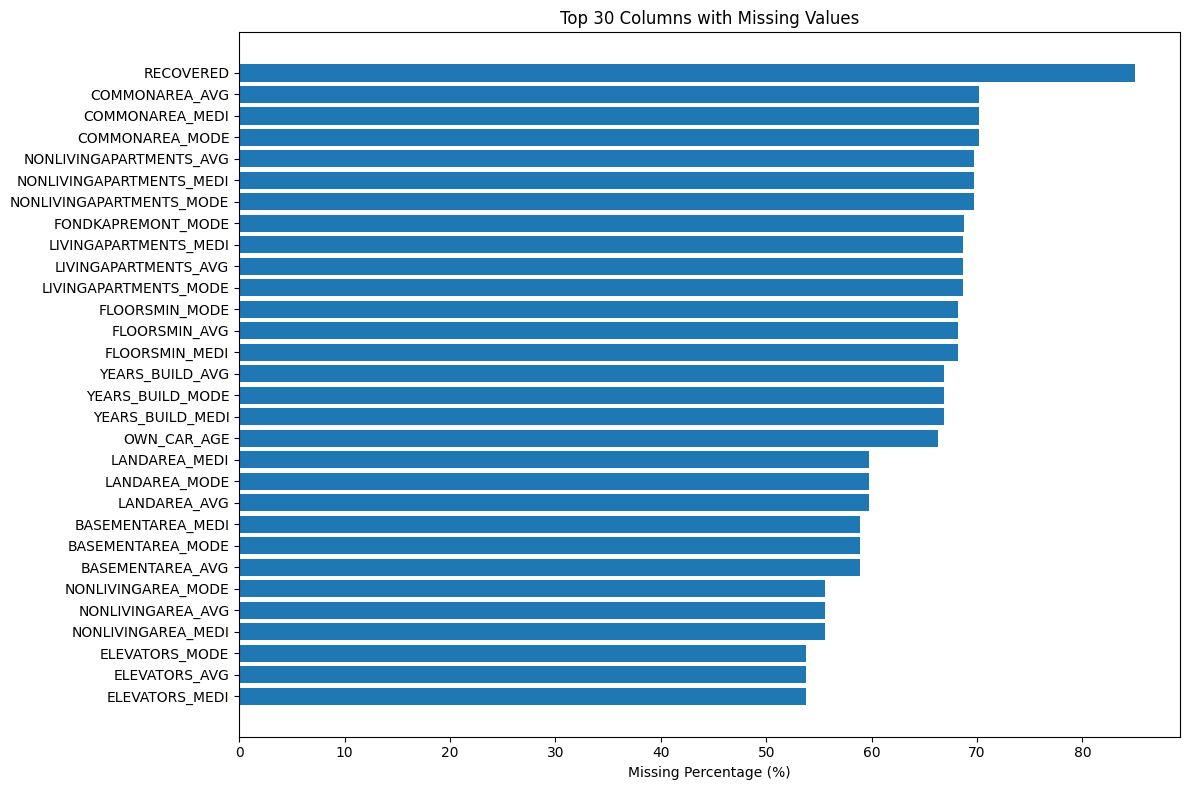

In [79]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': data.columns,
    'Missing_Count': data.isnull().sum(),
    'Missing_Percentage': (data.isnull().sum() / len(data)) * 100
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

print("=" * 60)
print("MISSING VALUE ANALYSIS")
print("=" * 60)
print(f"Total columns with missing values: {len(missing_data)}")
print(f"\nColumns with >50% missing values:")
high_missing = missing_data[missing_data['Missing_Percentage'] > 50]
print(high_missing)

print(f"\nTop 20 columns with missing values:")
print(missing_data.head(20))

# Visualize missing value patterns
if len(missing_data) > 0:
    plt.figure(figsize=(12, 8))
    top_missing = missing_data.head(30)
    plt.barh(range(len(top_missing)), top_missing['Missing_Percentage'])
    plt.yticks(range(len(top_missing)), top_missing['Column'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top 30 Columns with Missing Values')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


### A.3 Target Variable Analysis


TARGET VARIABLE ANALYSIS
Target distribution:
  Class 0 (No payment difficulties): 134,973 (85.00%)
  Class 1 (Payment difficulties): 23,818 (15.00%)

Class imbalance ratio: 5.67:1


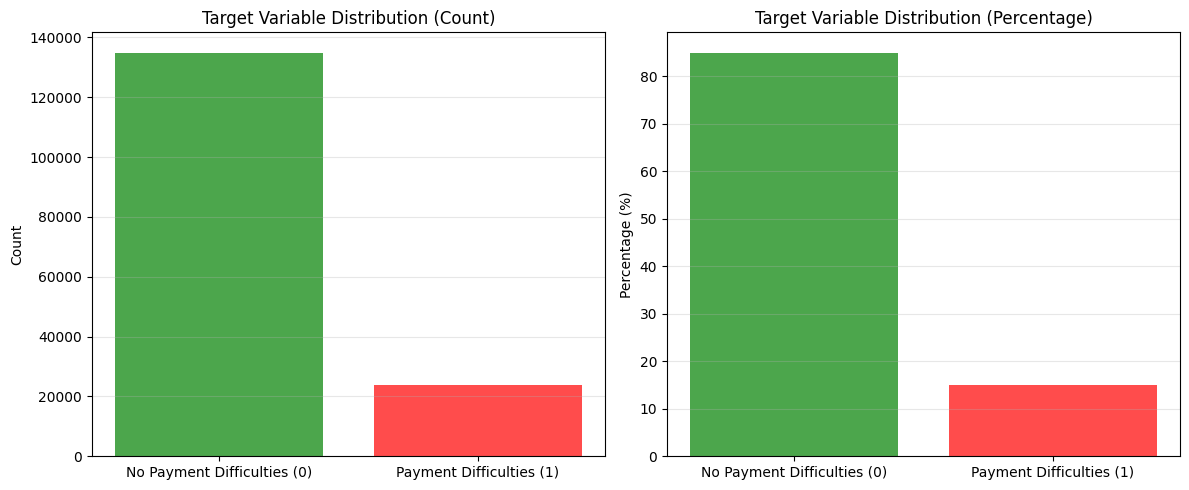

In [80]:
# Analyze target variable
print("=" * 60)
print("TARGET VARIABLE ANALYSIS")
print("=" * 60)

target_counts = data['TARGET'].value_counts()
target_percentages = data['TARGET'].value_counts(normalize=True) * 100

print(f"Target distribution:")
print(f"  Class 0 (No payment difficulties): {target_counts[0]:,} ({target_percentages[0]:.2f}%)")
print(f"  Class 1 (Payment difficulties): {target_counts[1]:,} ({target_percentages[1]:.2f}%)")
print(f"\nClass imbalance ratio: {target_counts[0] / target_counts[1]:.2f}:1")

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
axes[0].bar(['No Payment Difficulties (0)', 'Payment Difficulties (1)'], 
            [target_counts[0], target_counts[1]], 
            color=['green', 'red'], alpha=0.7)
axes[0].set_ylabel('Count')
axes[0].set_title('Target Variable Distribution (Count)')
axes[0].grid(axis='y', alpha=0.3)

# Percentage plot
axes[1].bar(['No Payment Difficulties (0)', 'Payment Difficulties (1)'], 
            [target_percentages[0], target_percentages[1]], 
            color=['green', 'red'], alpha=0.7)
axes[1].set_ylabel('Percentage (%)')
axes[1].set_title('Target Variable Distribution (Percentage)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### A.4 Feature Type Identification


In [81]:
# Identify feature types
print("=" * 60)
print("FEATURE TYPE IDENTIFICATION")
print("=" * 60)

# Categorical features
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical features ({len(categorical_cols)}):")
print(categorical_cols)

# Numerical features
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
# Remove target and ID from numerical
numerical_cols = [col for col in numerical_cols if col not in ['TARGET', 'SK_ID_CURR']]
print(f"\nNumerical features ({len(numerical_cols)}):")
print(numerical_cols[:20], "..." if len(numerical_cols) > 20 else "")

# Binary flag features
binary_cols = [col for col in data.columns if col.startswith('FLAG_')]
print(f"\nBinary flag features ({len(binary_cols)}):")
print(binary_cols)

# Time-based features
time_cols = [col for col in data.columns if 'DAYS' in col]
print(f"\nTime-based features ({len(time_cols)}):")
print(time_cols)

# Building features
building_cols = [col for col in data.columns if any(suffix in col for suffix in ['_AVG', '_MODE', '_MEDI'])]
print(f"\nBuilding features ({len(building_cols)}):")
print(f"  Examples: {building_cols[:5]}")

# Store for later use
feature_types = {
    'categorical': categorical_cols,
    'numerical': numerical_cols,
    'binary': binary_cols,
    'time': time_cols,
    'building': building_cols
}


FEATURE TYPE IDENTIFICATION

Categorical features (16):
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

Numerical features (77):
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'] ...

Binary flag features (8):
['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']

Time-based features (5):
['DAYS_BIRTH', 'DAY

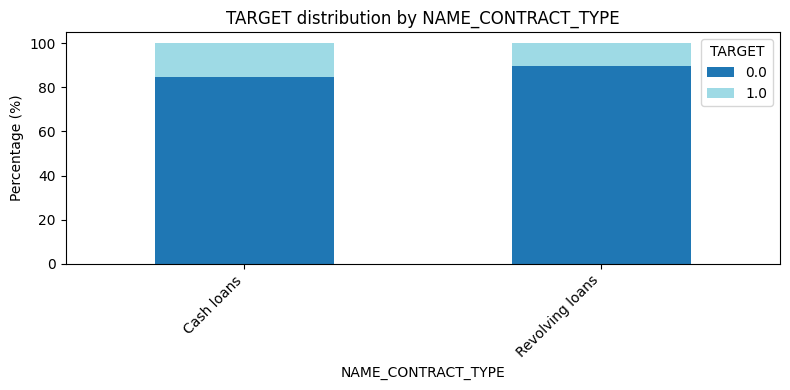

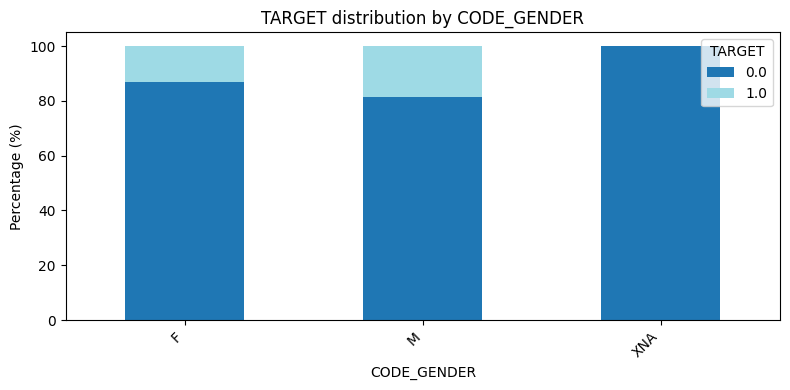

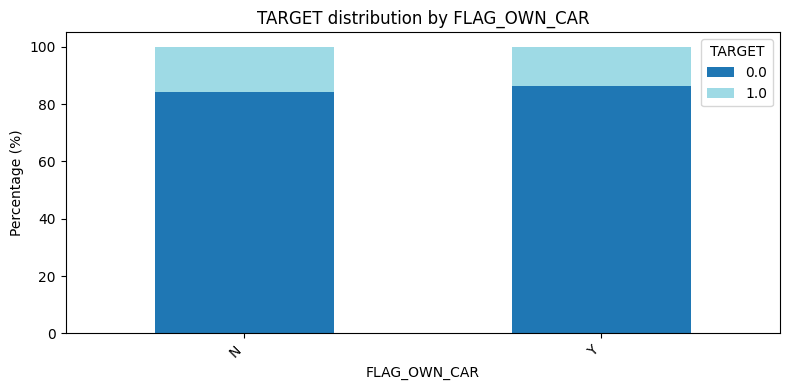

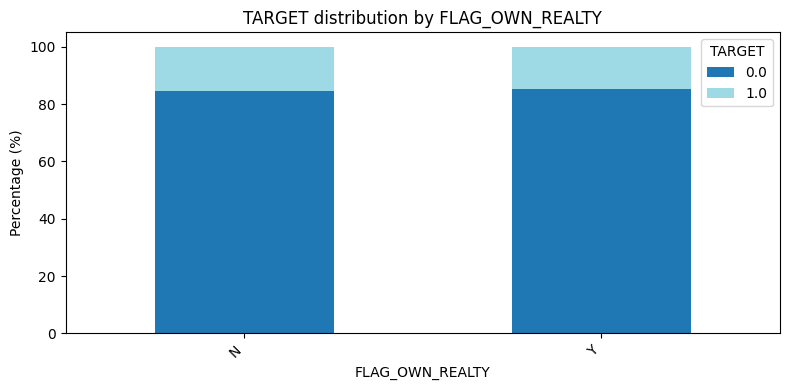

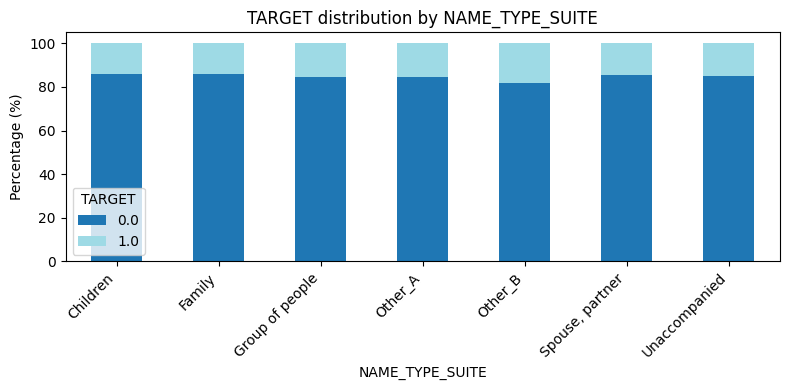

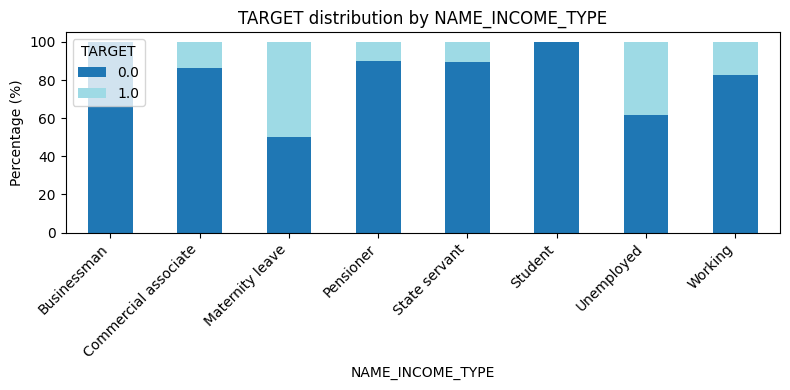

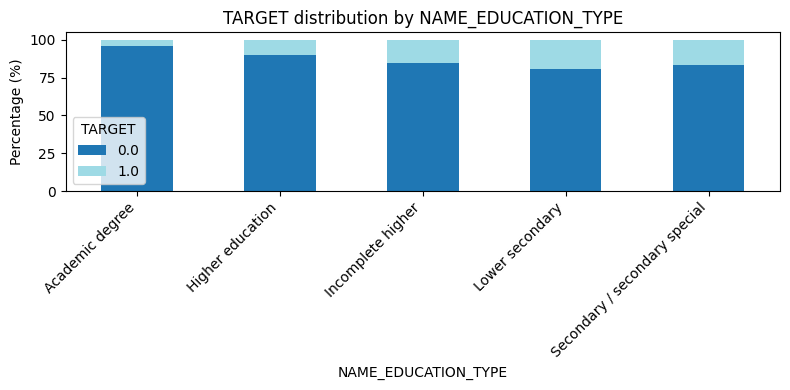

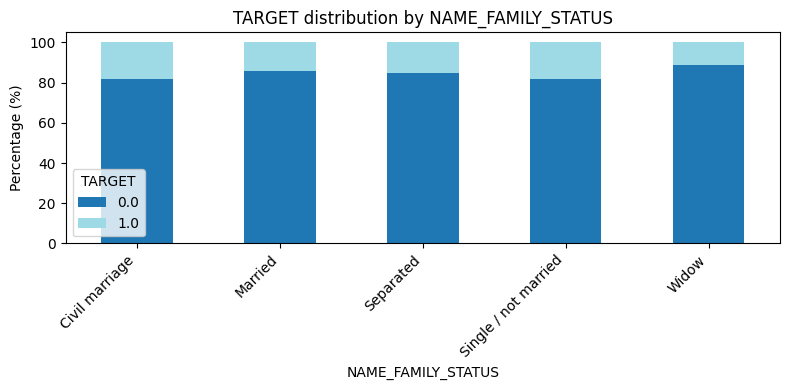

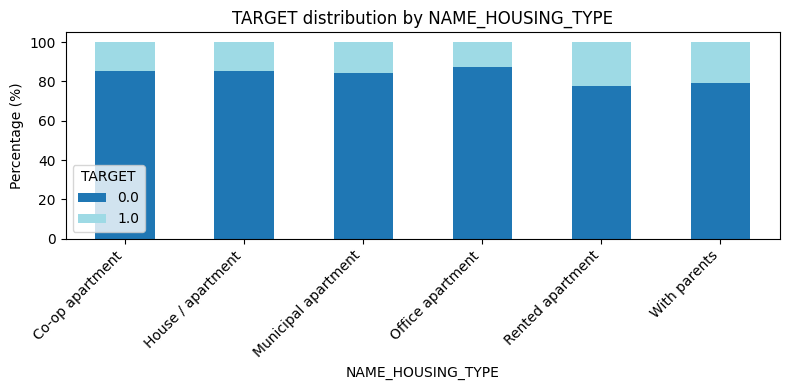

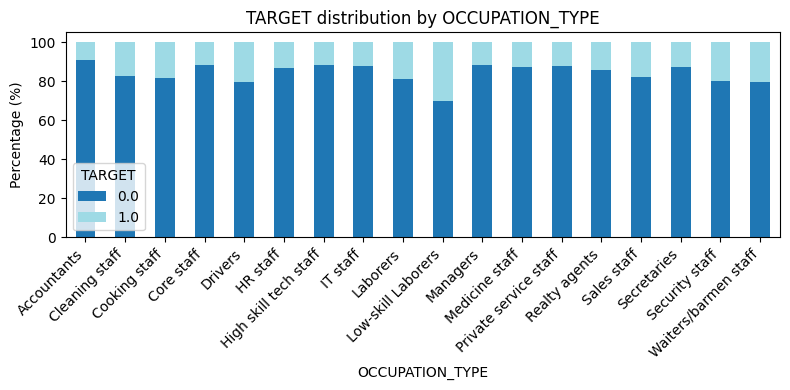

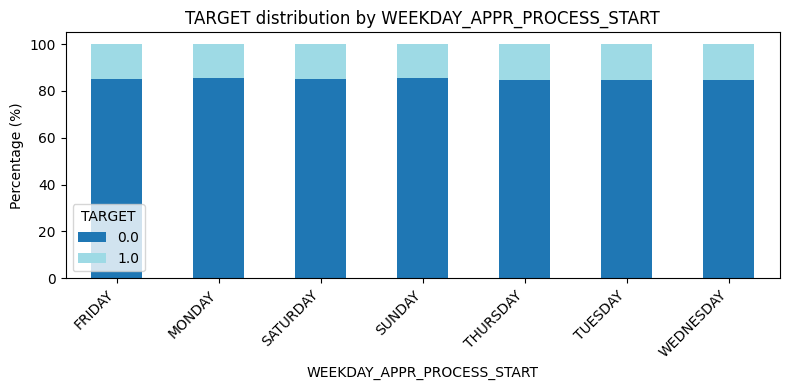

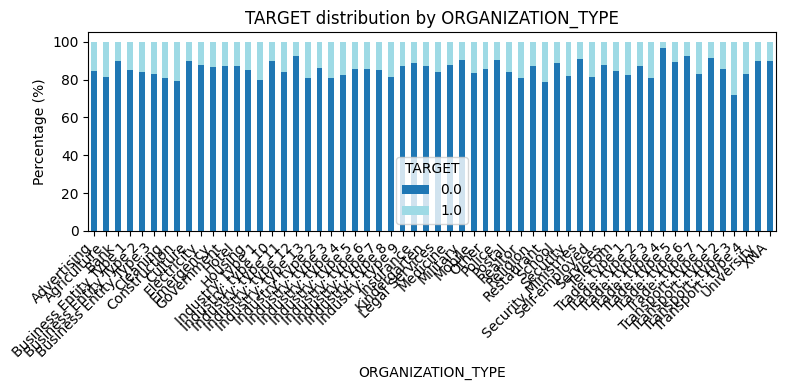

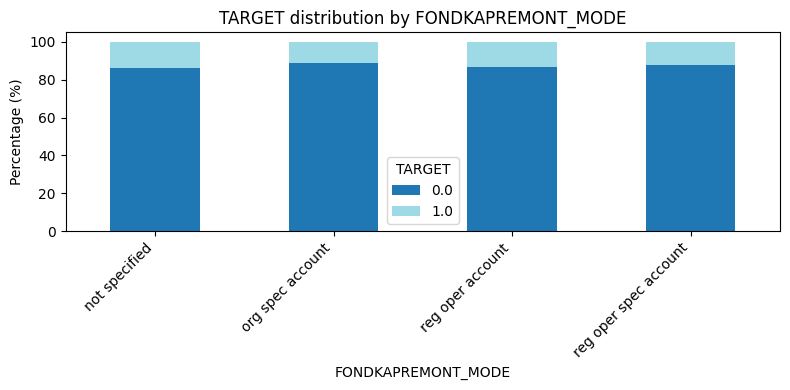

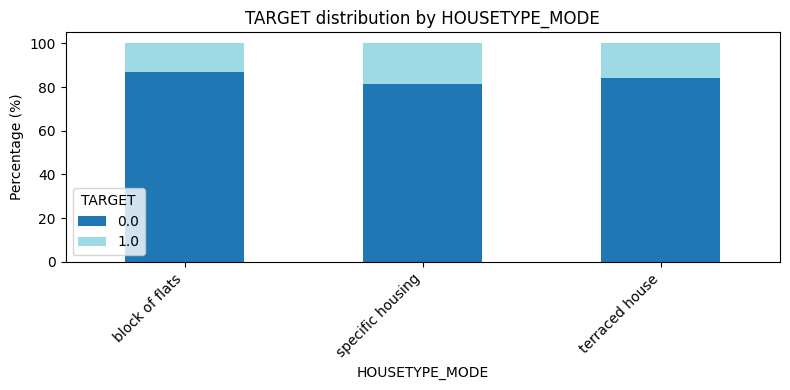

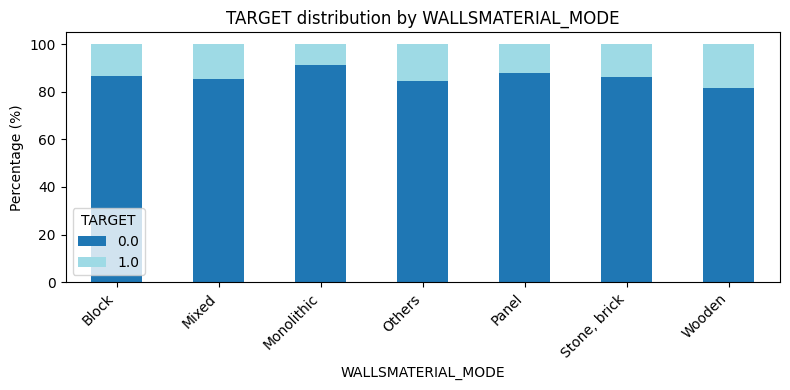

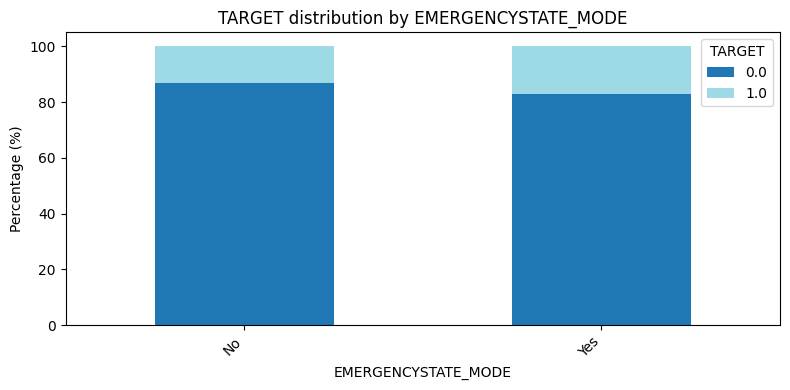

In [82]:
import matplotlib.pyplot as plt

for col in categorical_cols:
    table = pd.crosstab(data[col], data["TARGET"], normalize='index') * 100

    table.plot(
        kind="bar",
        stacked=True,
        figsize=(8, 4),
        colormap="tab20"
    )

    plt.ylabel("Percentage (%)")
    plt.title(f"TARGET distribution by {col}")
    plt.legend(title="TARGET")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


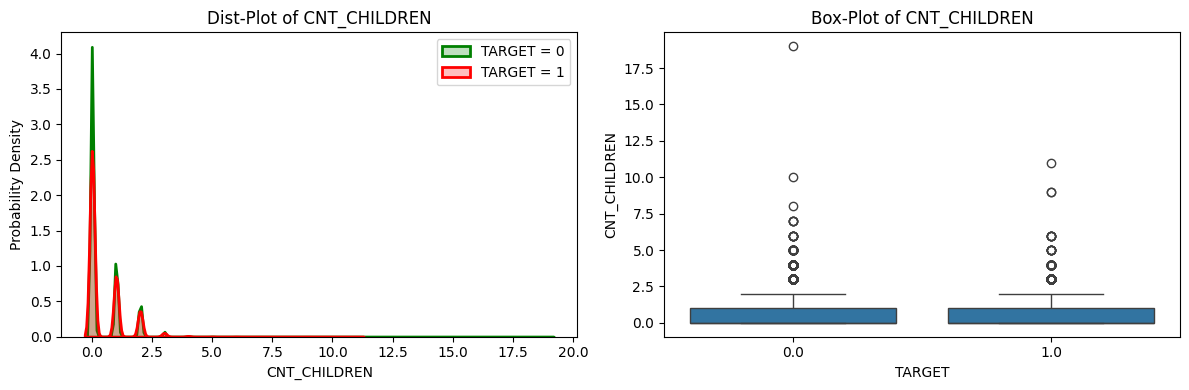

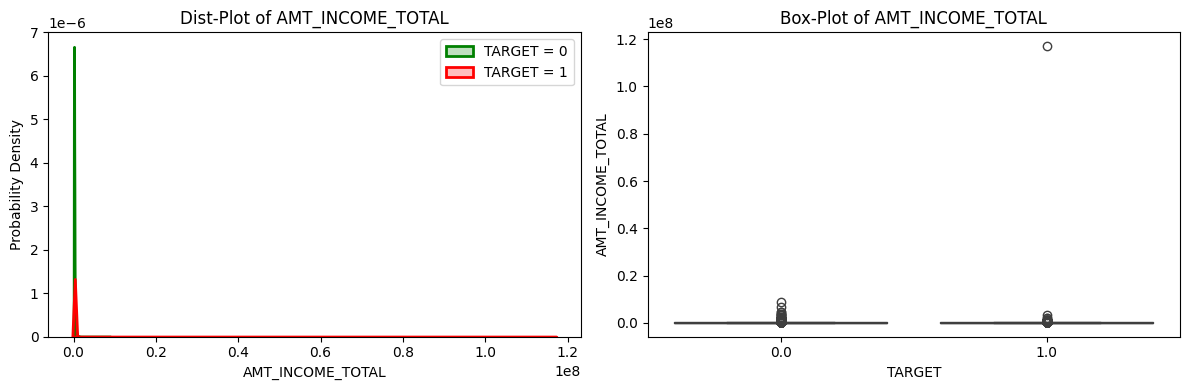

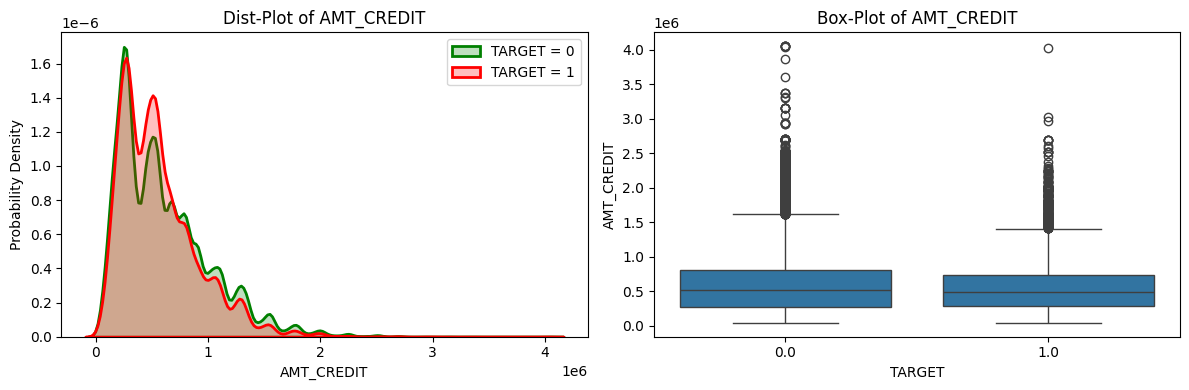

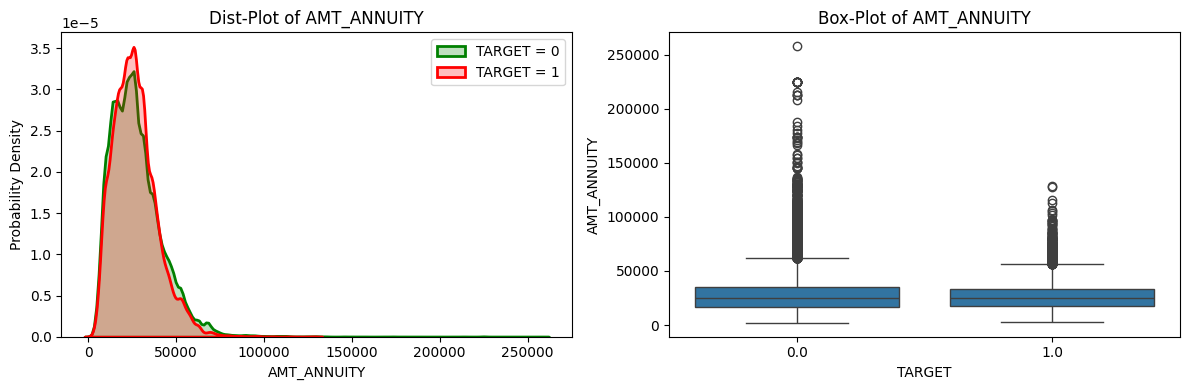

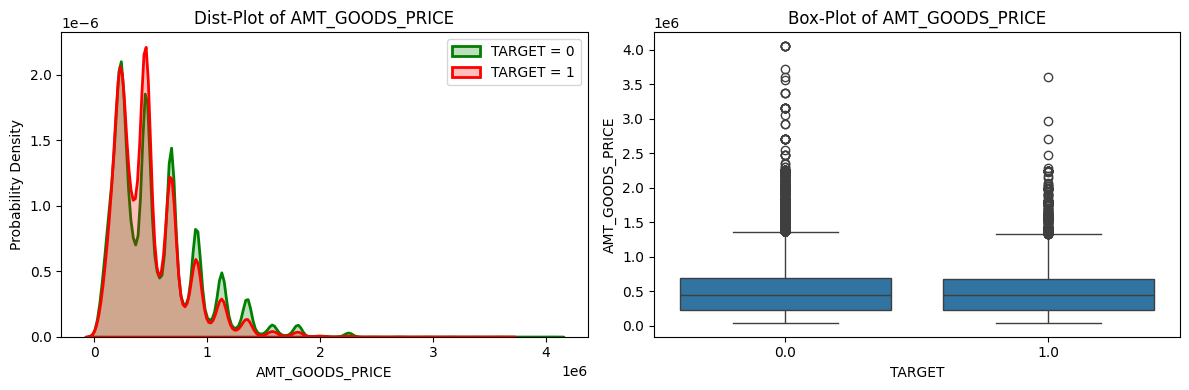

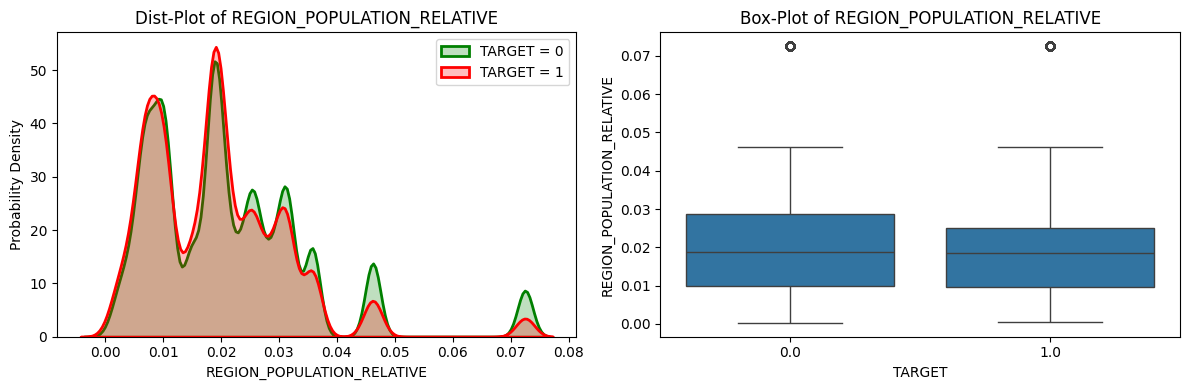

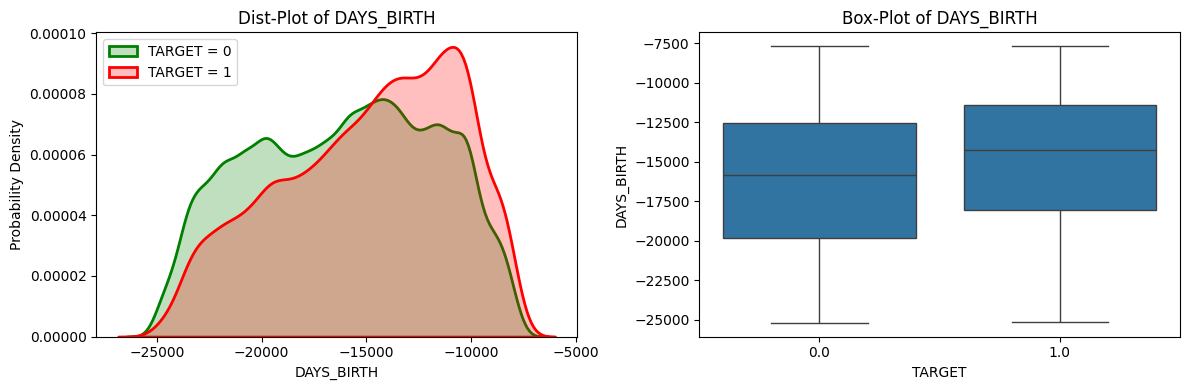

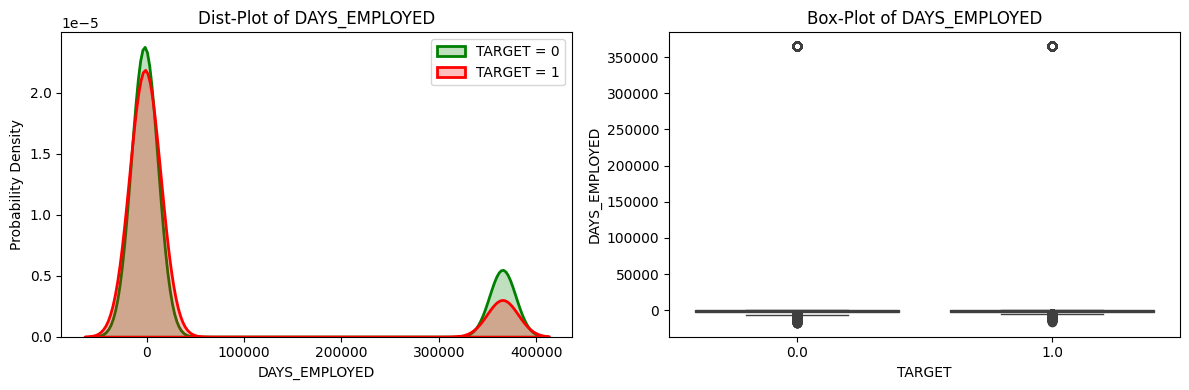

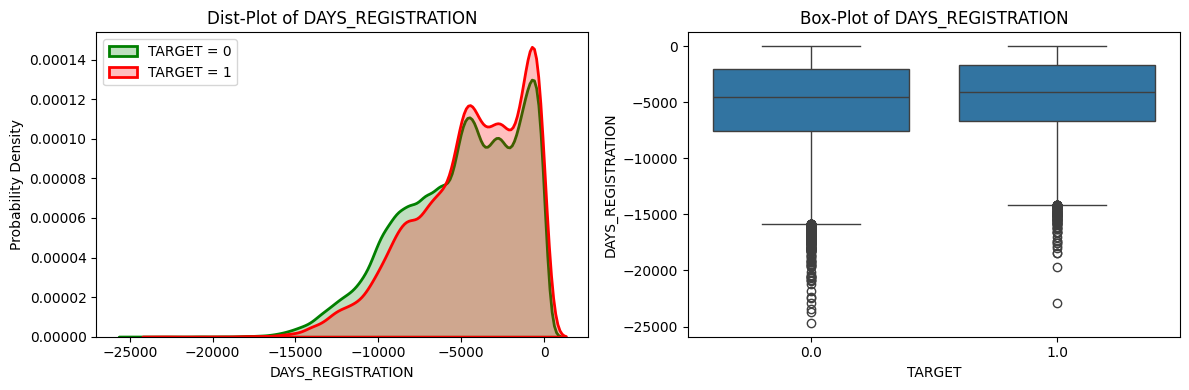

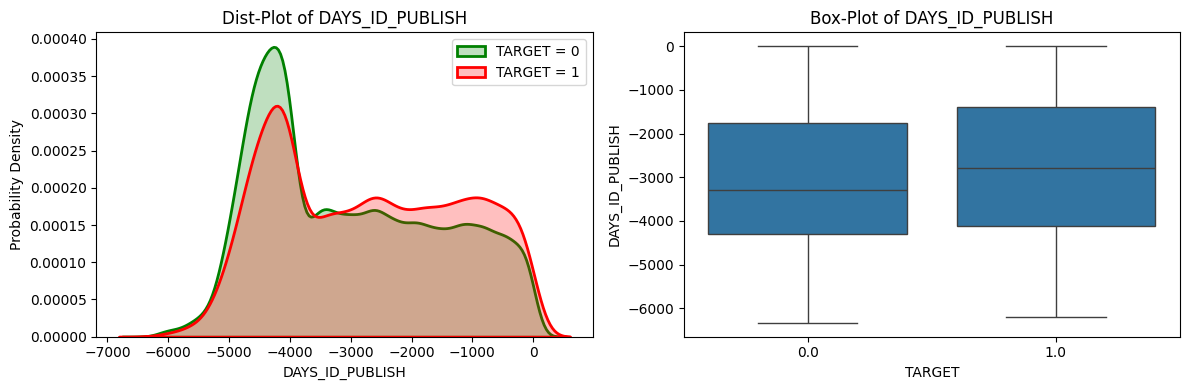

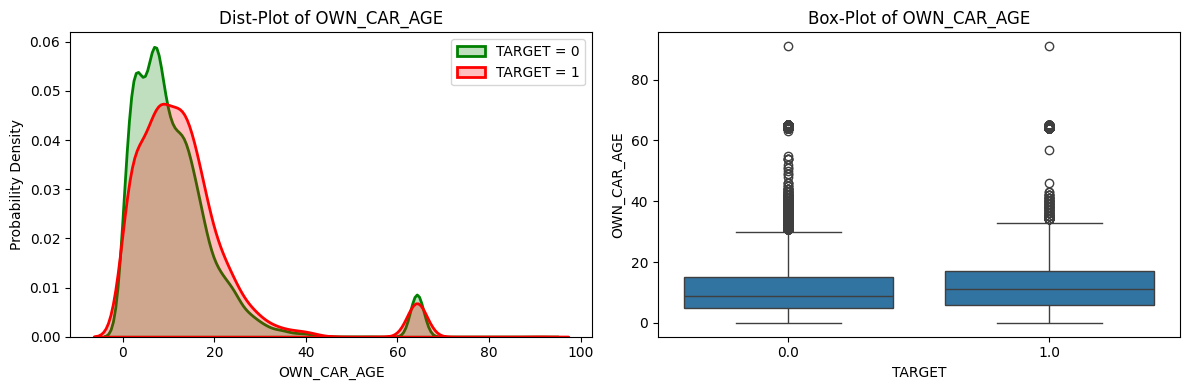

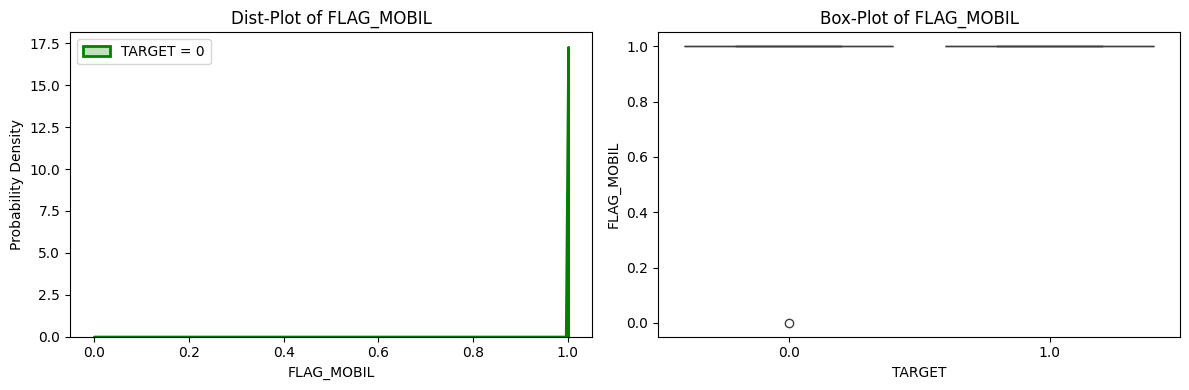

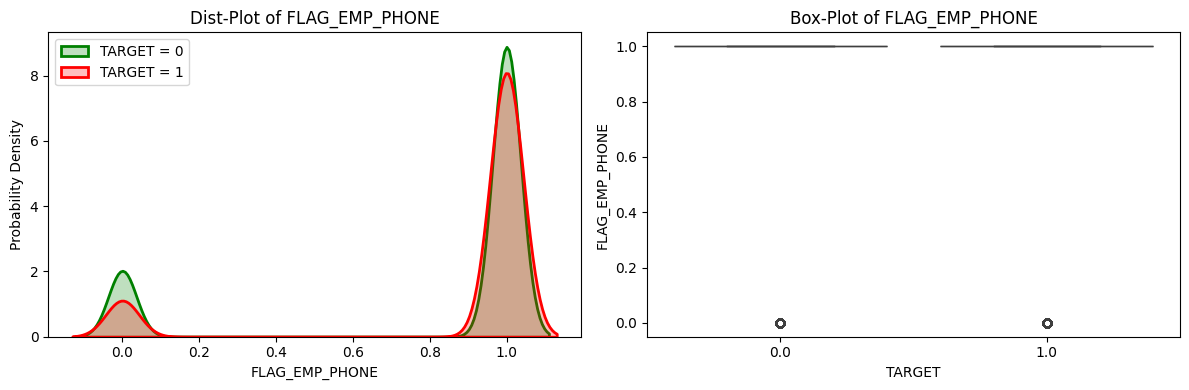

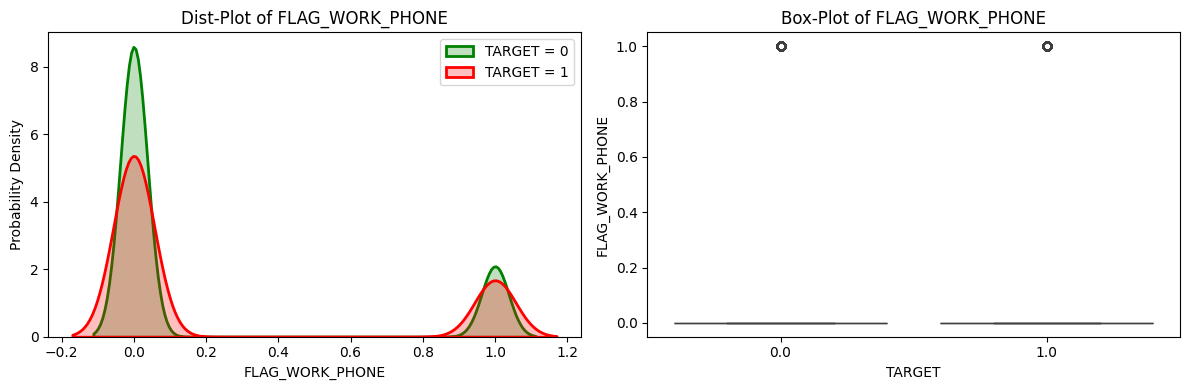

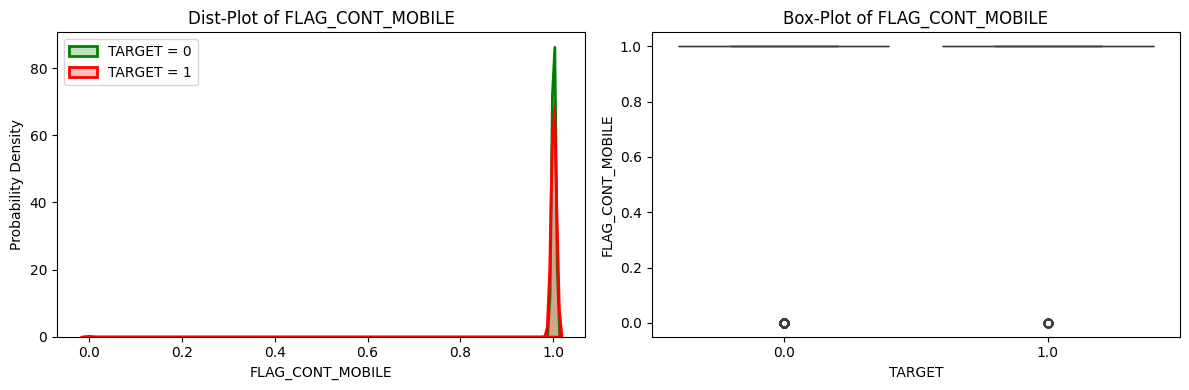

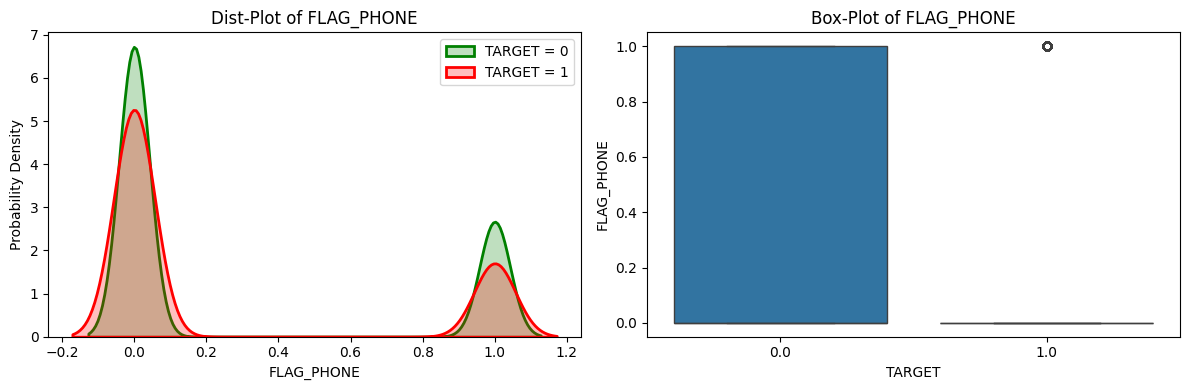

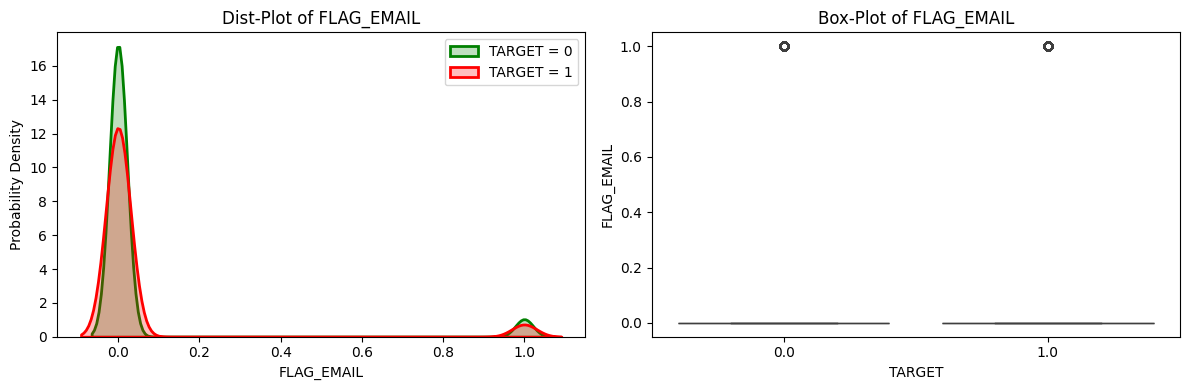

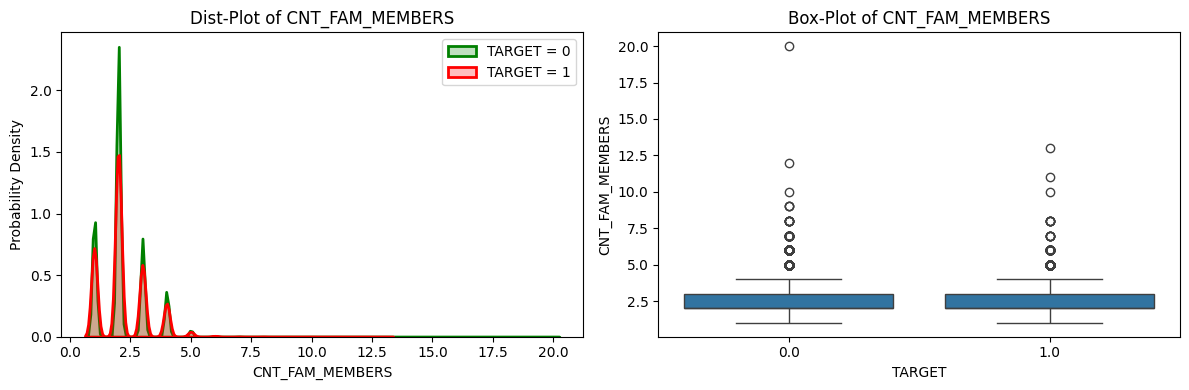

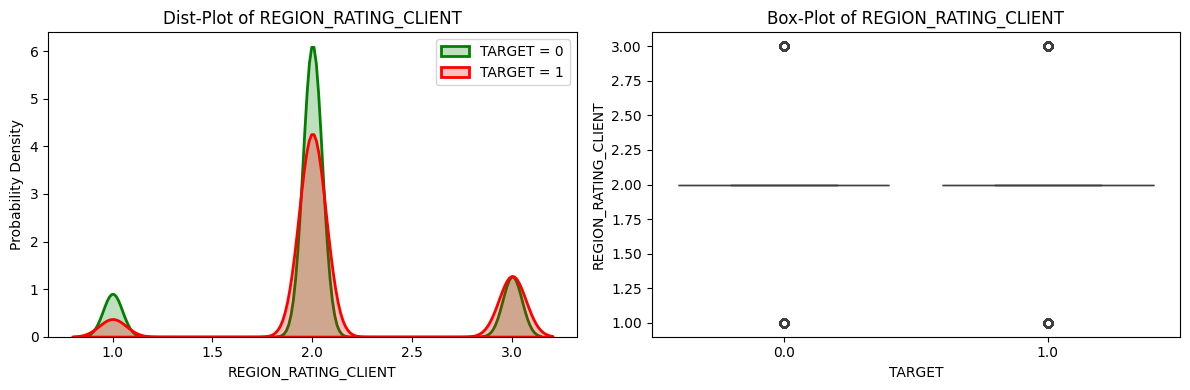

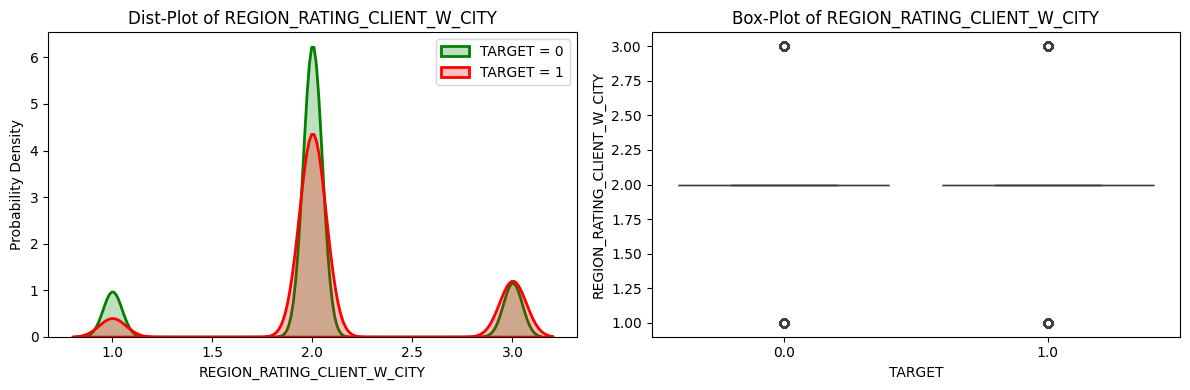

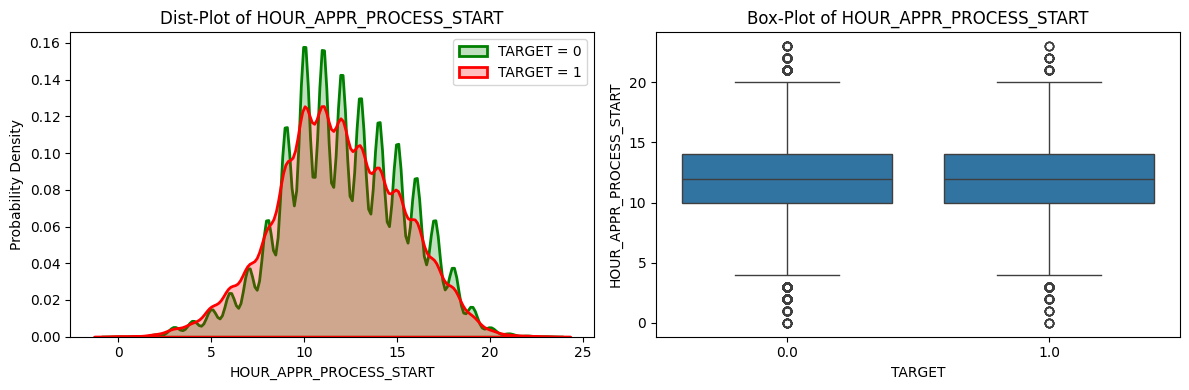

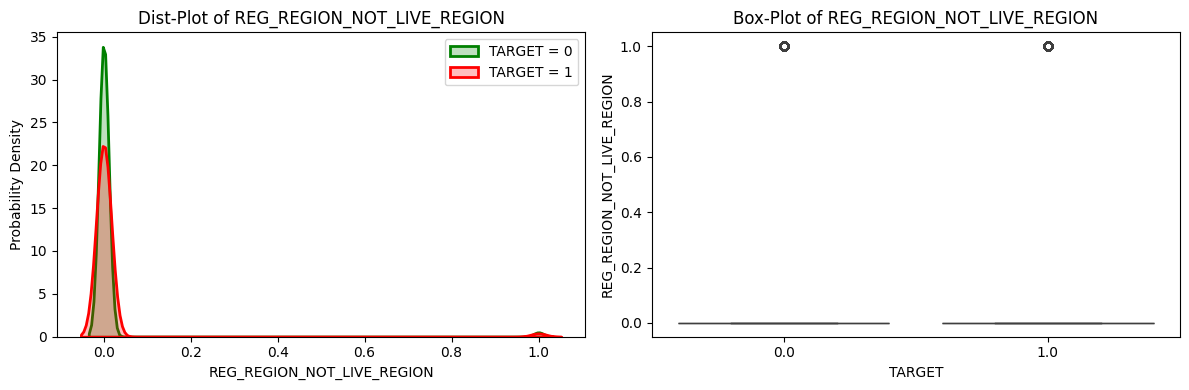

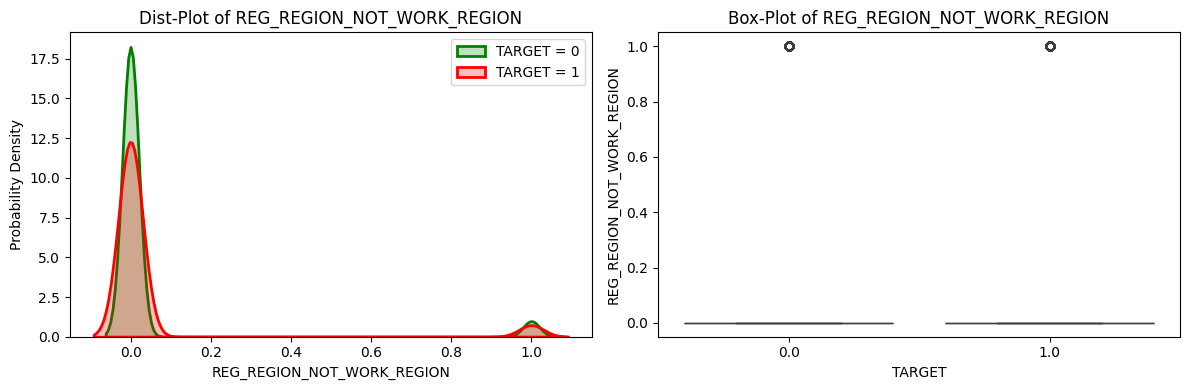

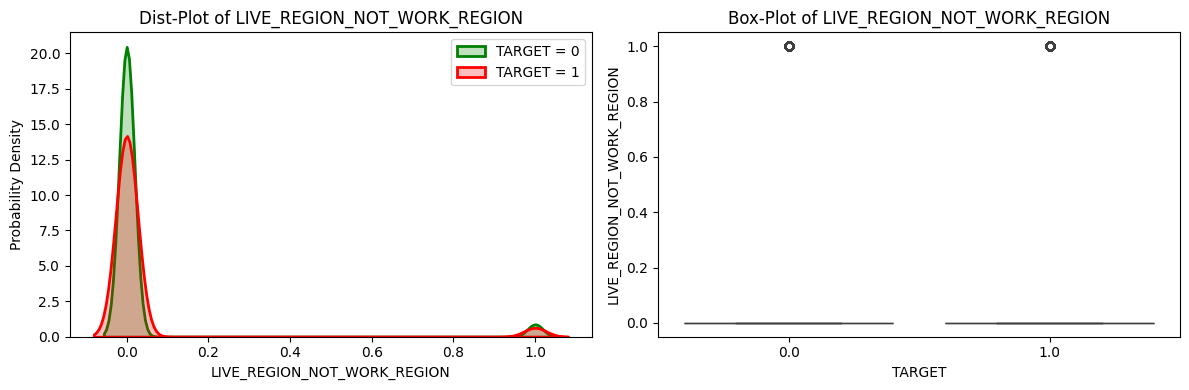

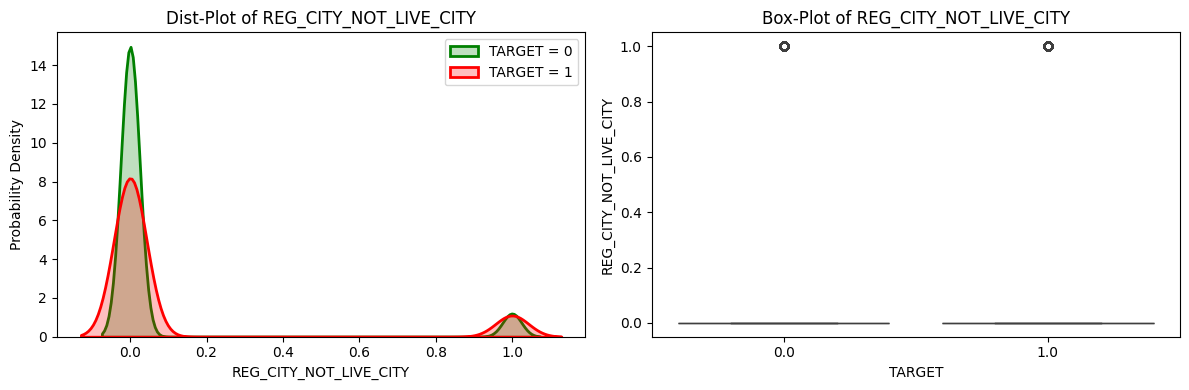

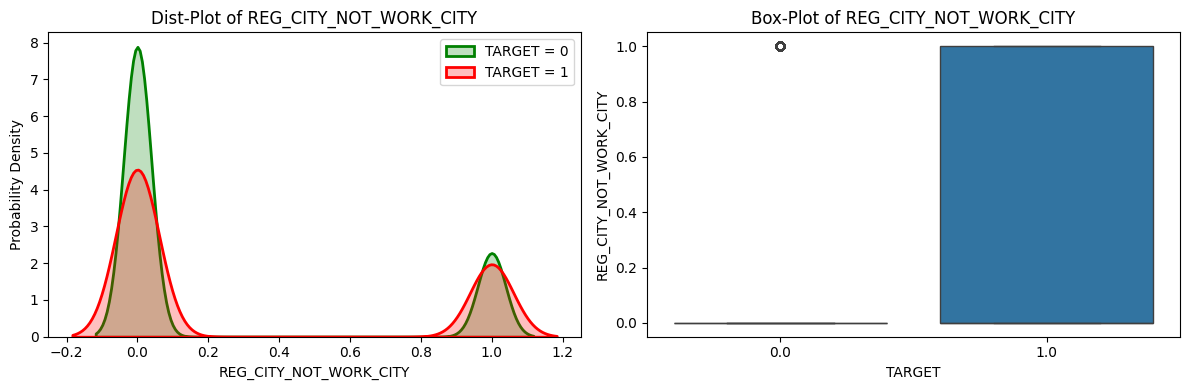

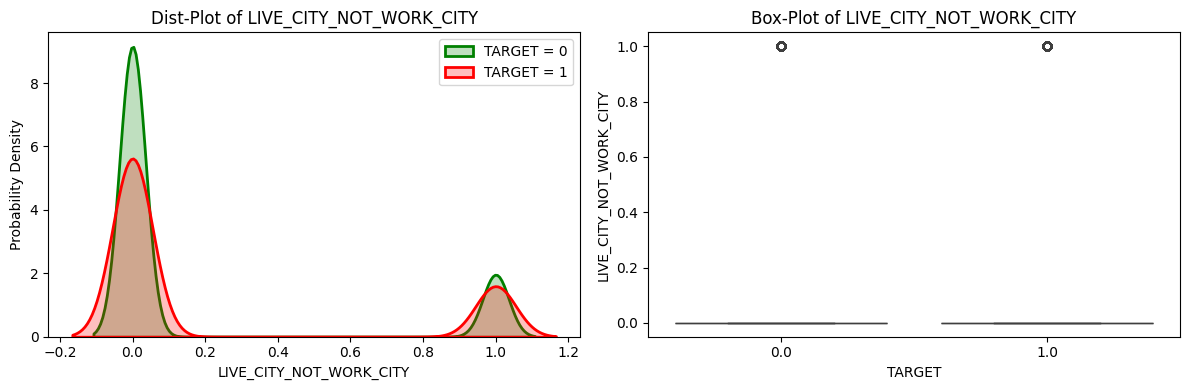

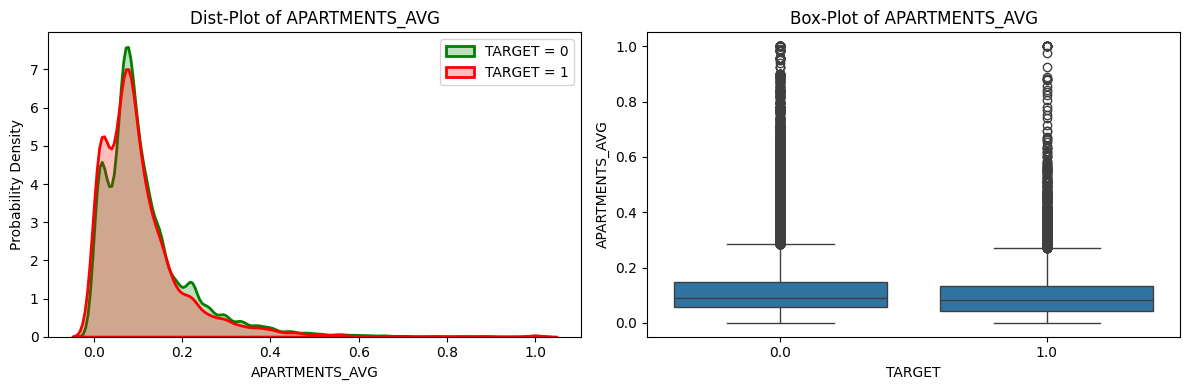

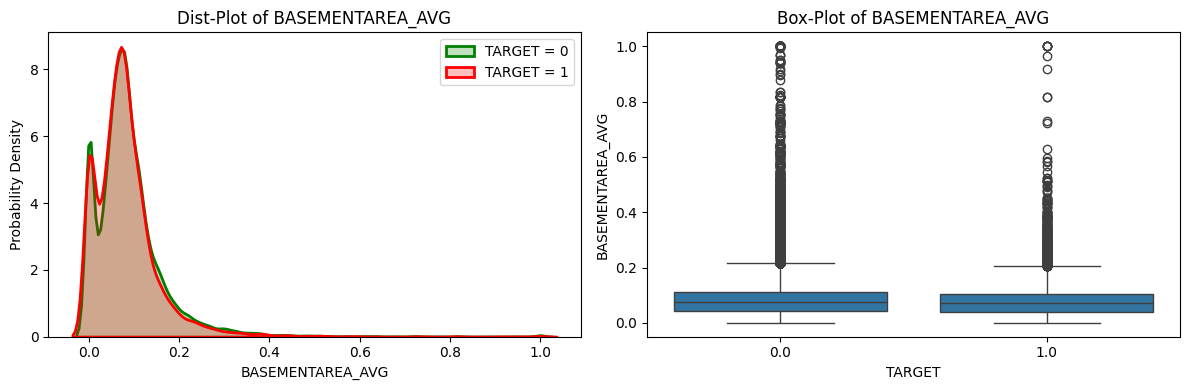

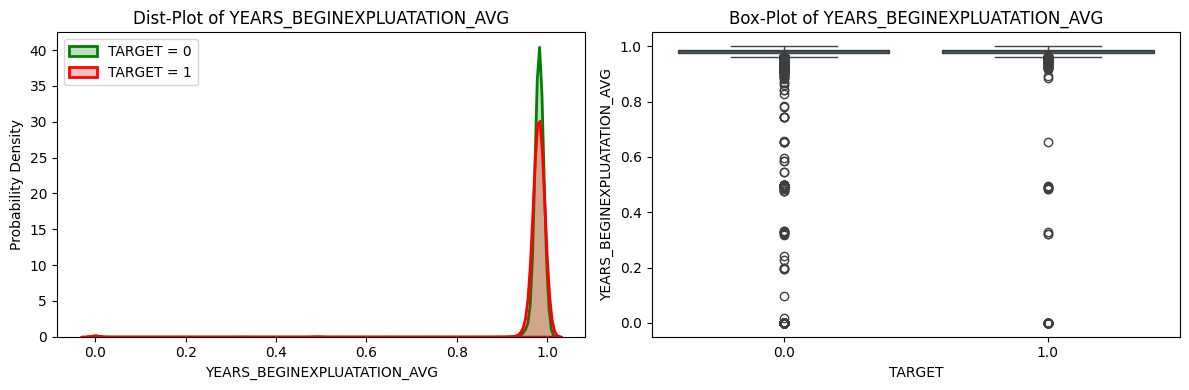

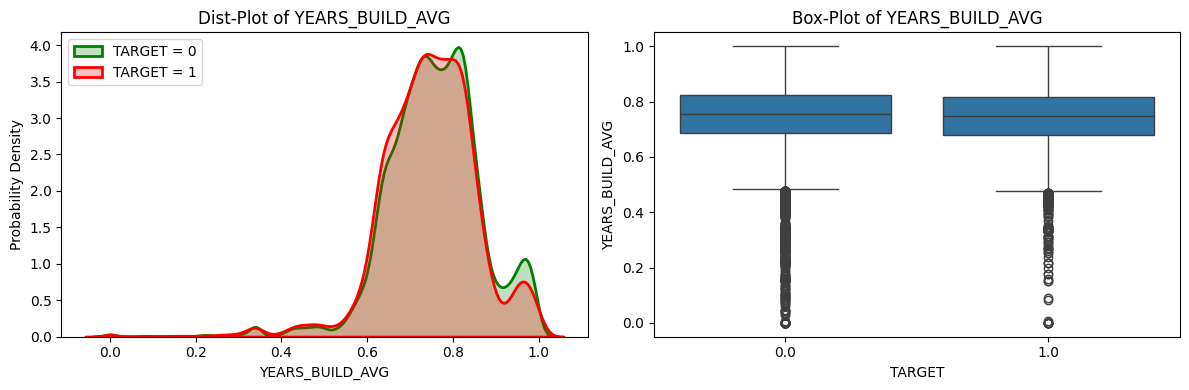

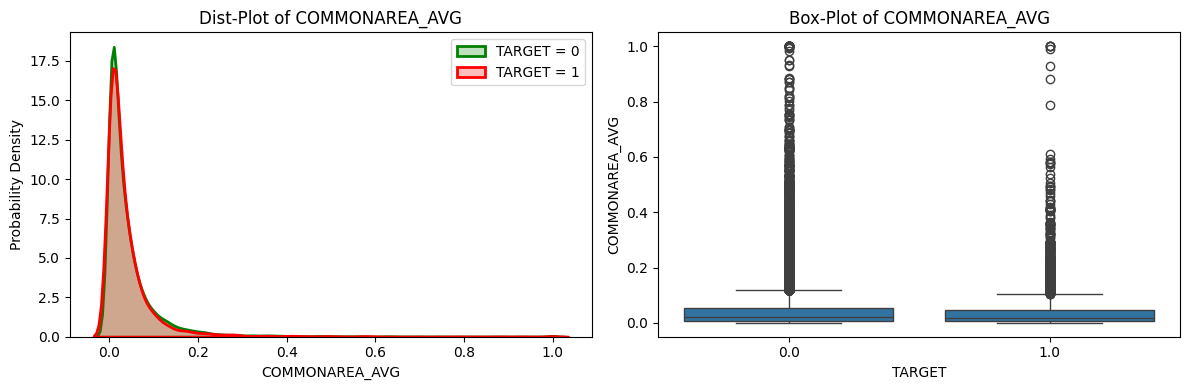

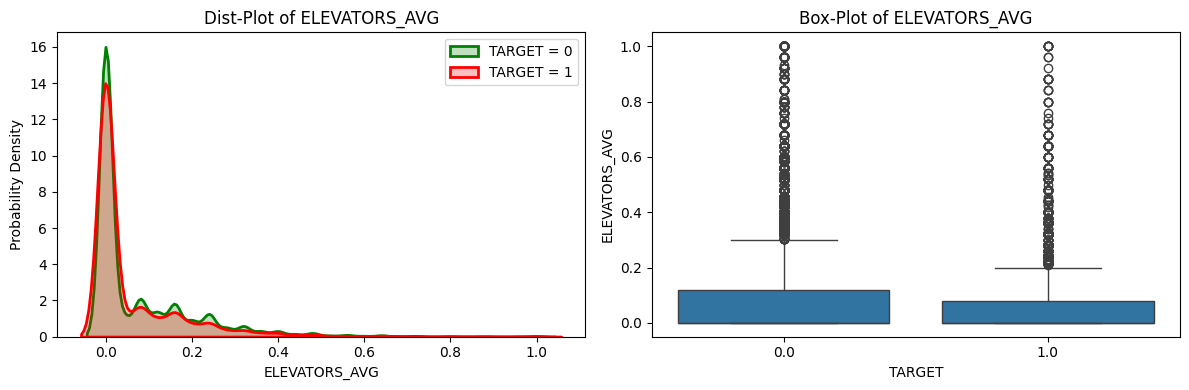

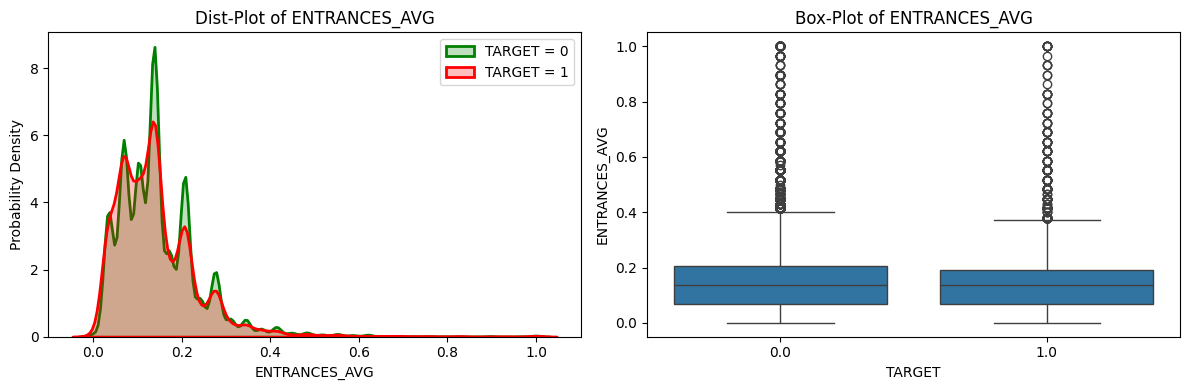

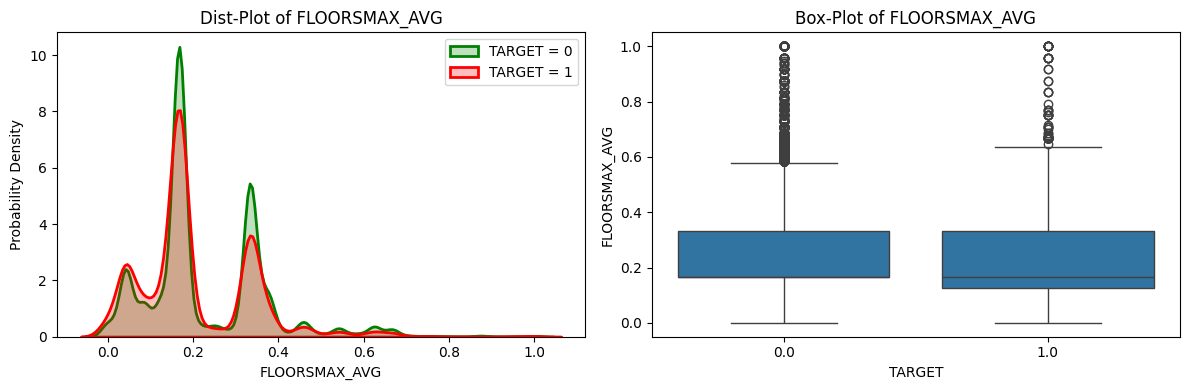

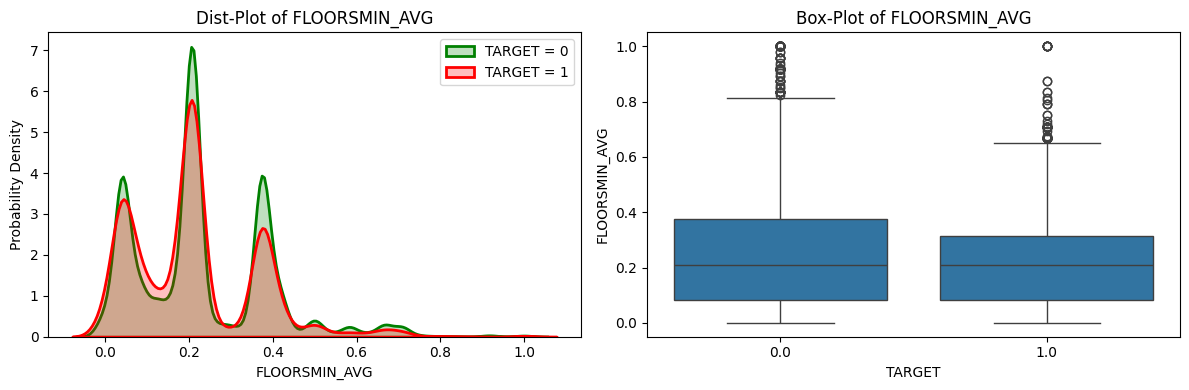

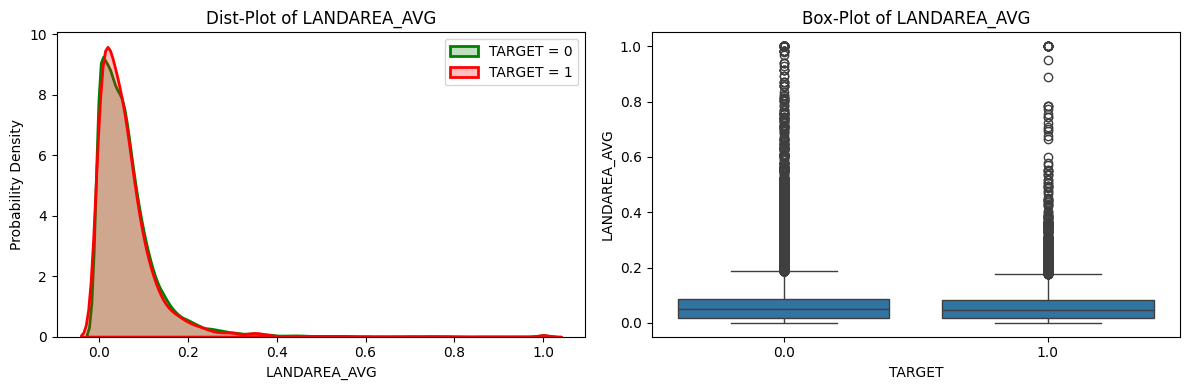

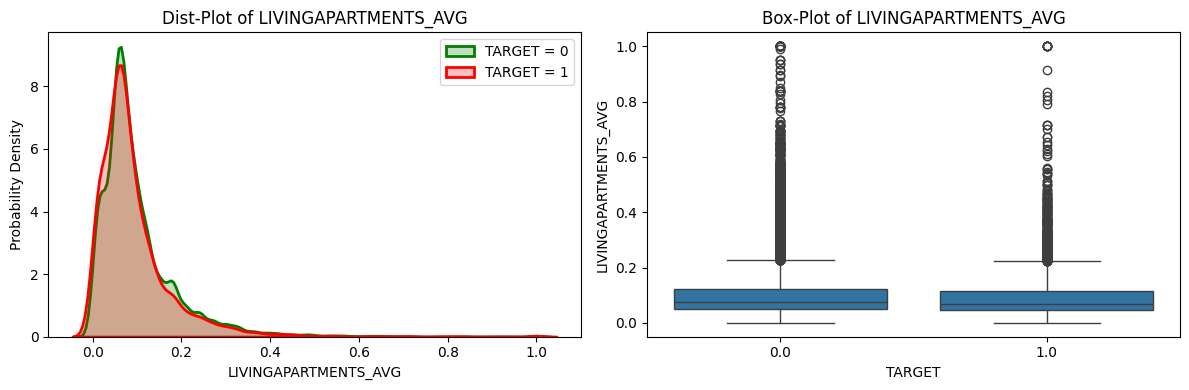

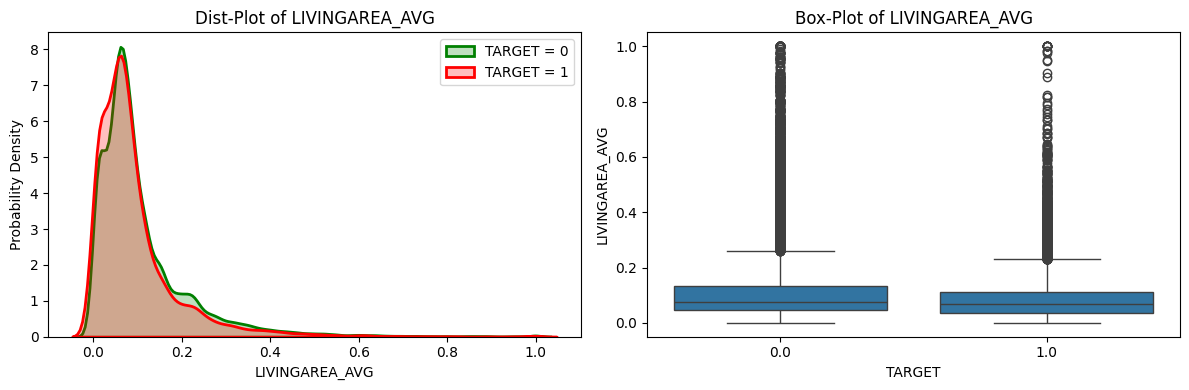

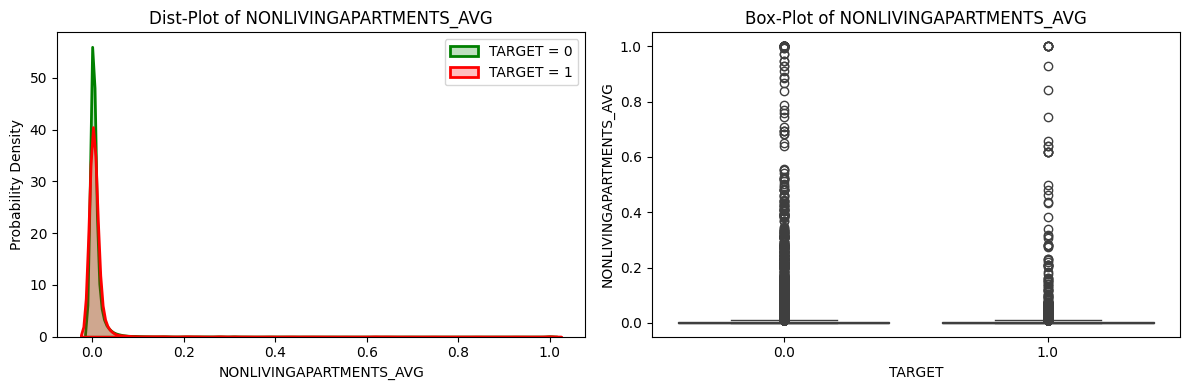

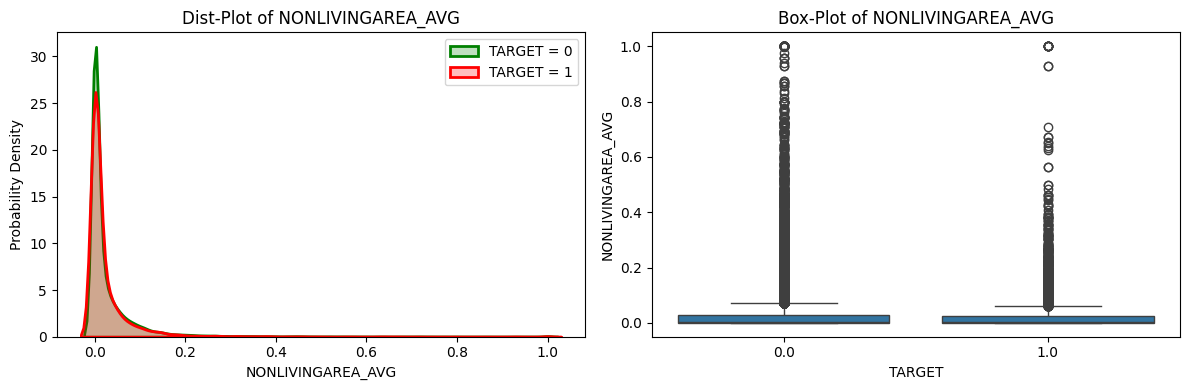

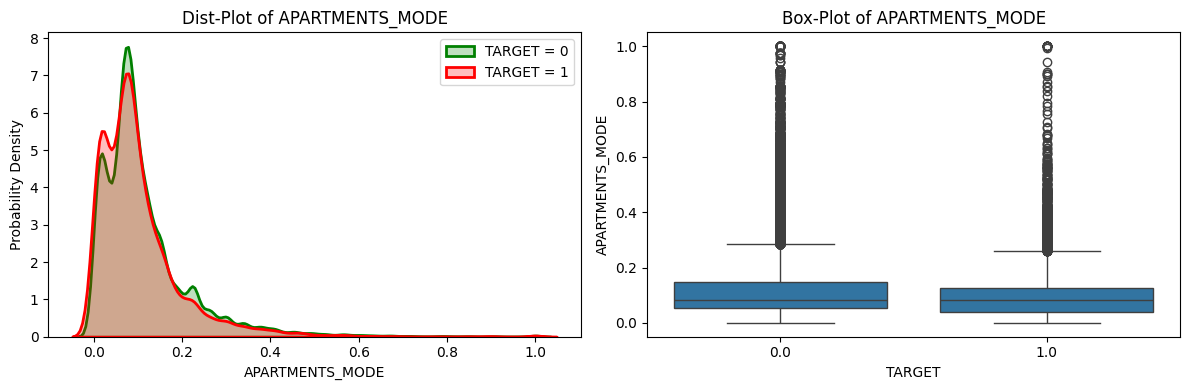

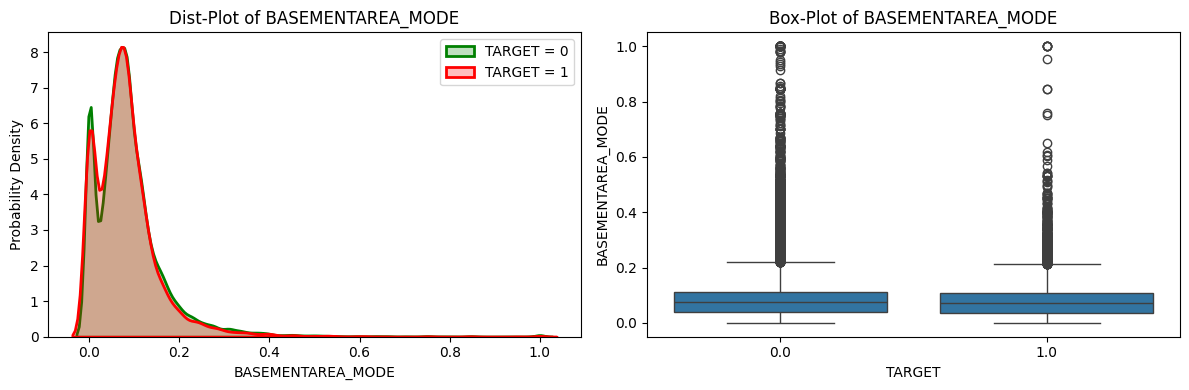

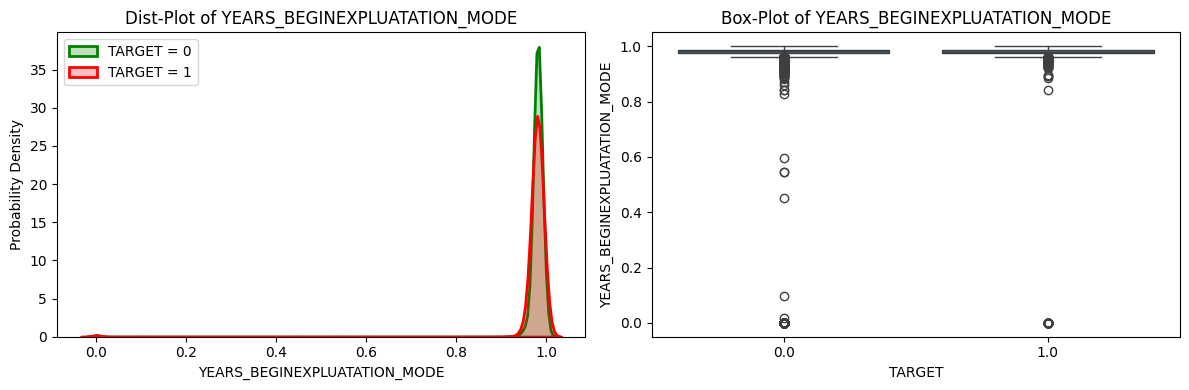

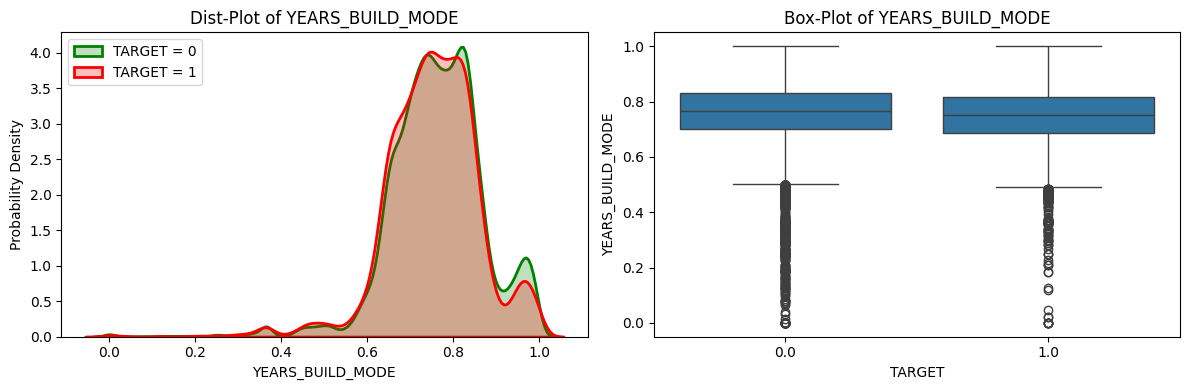

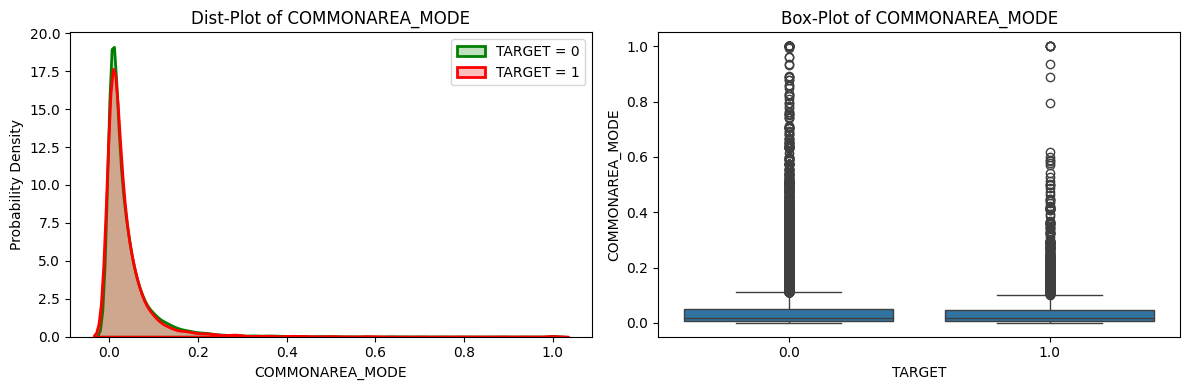

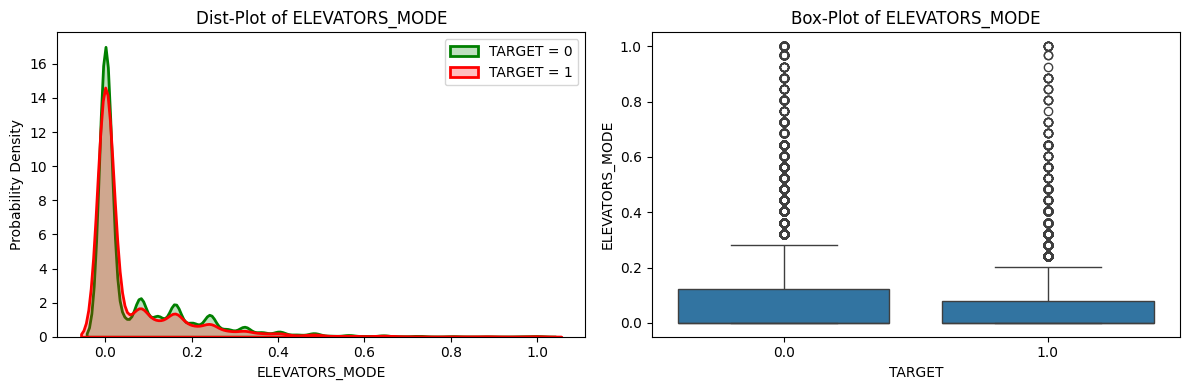

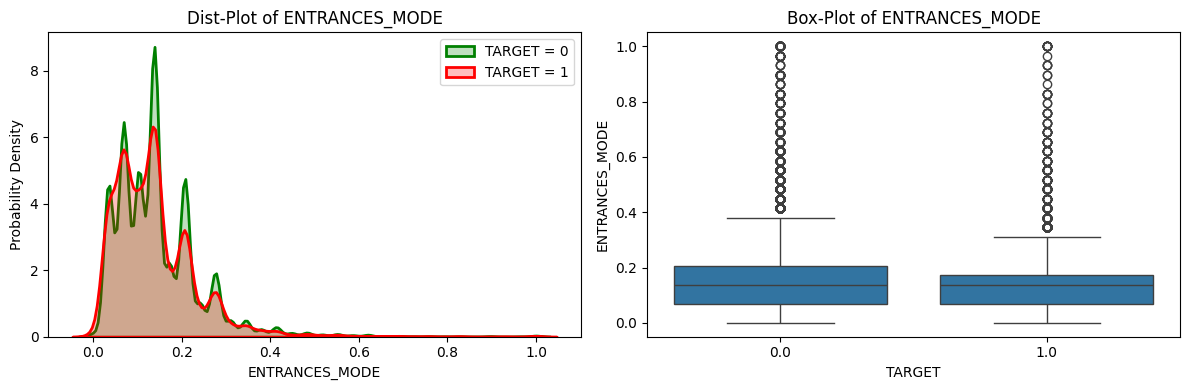

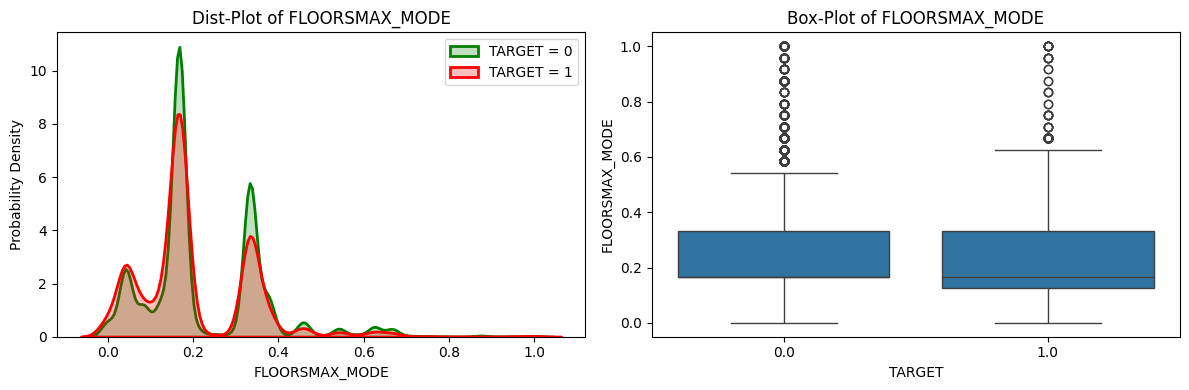

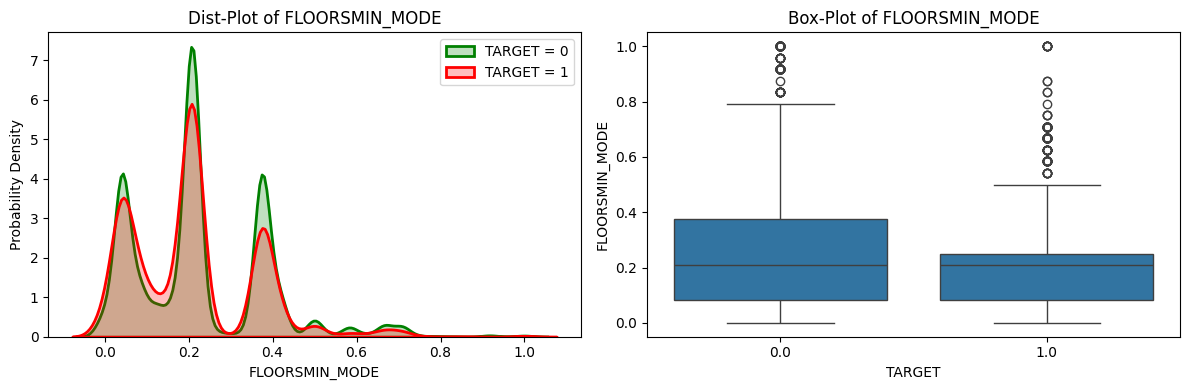

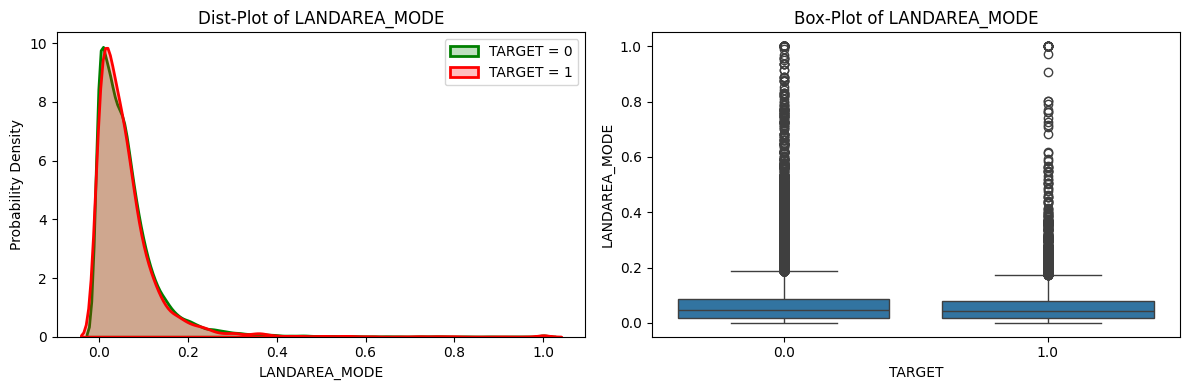

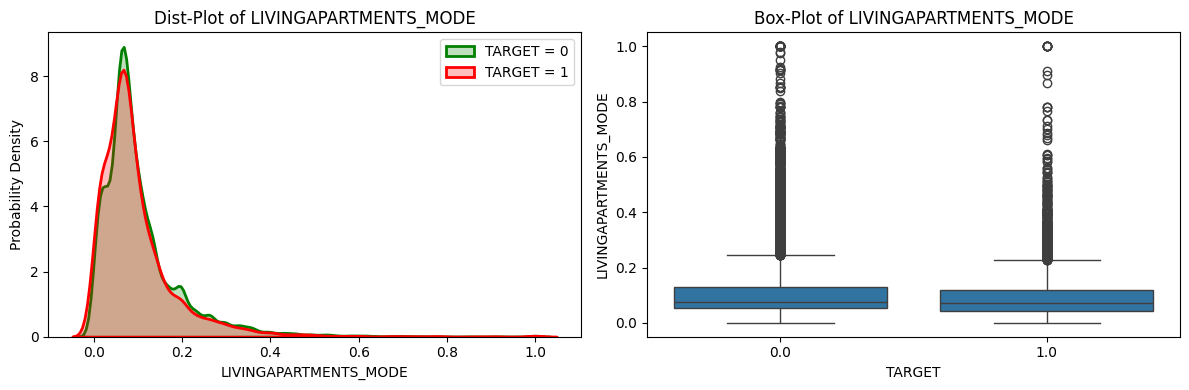

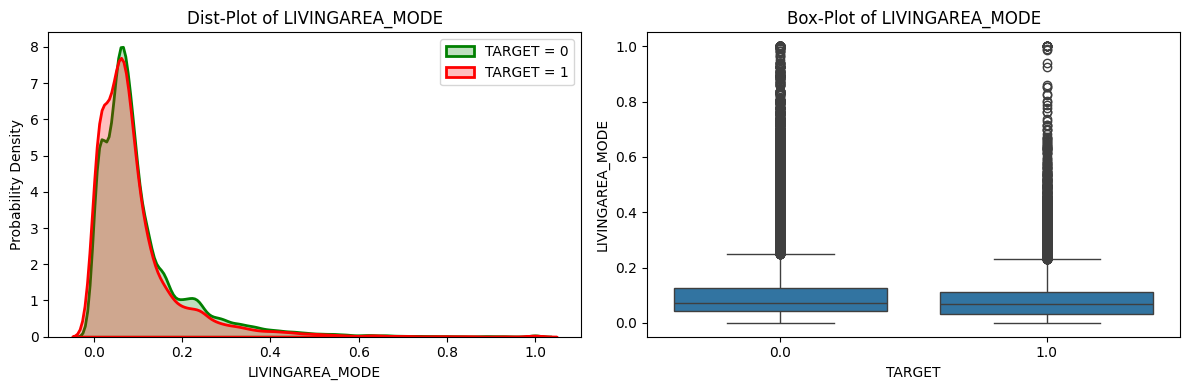

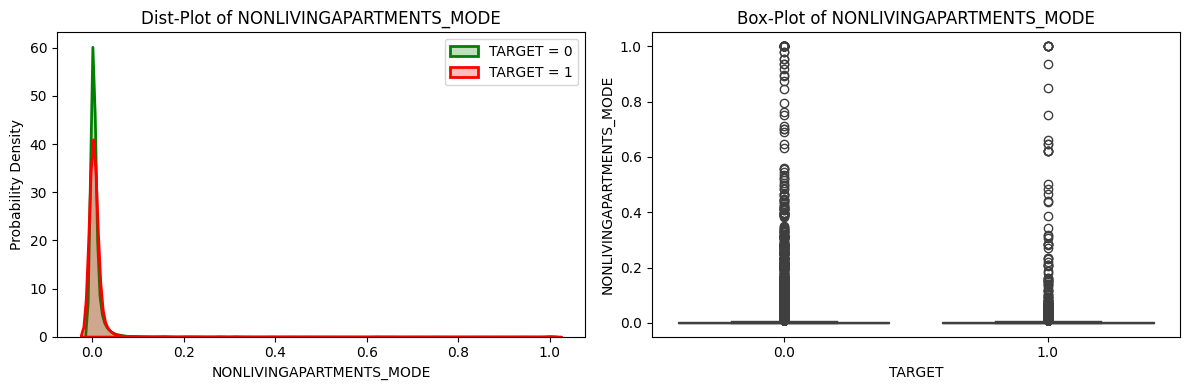

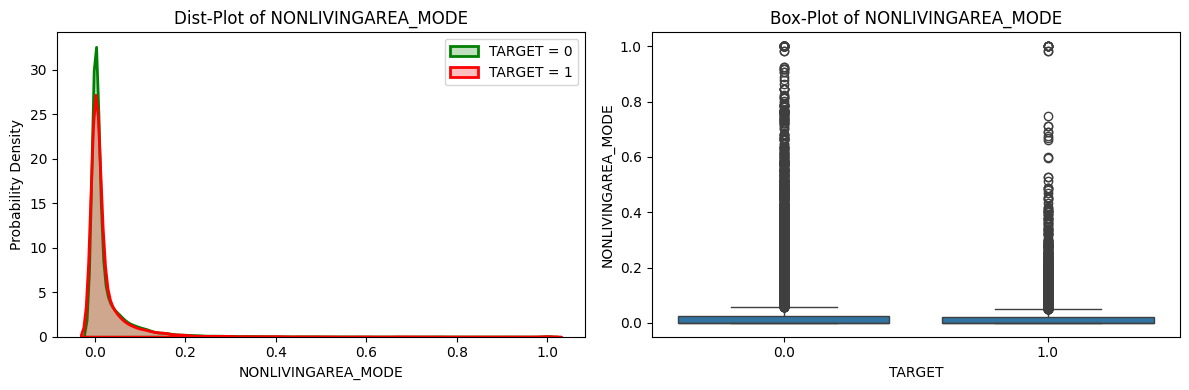

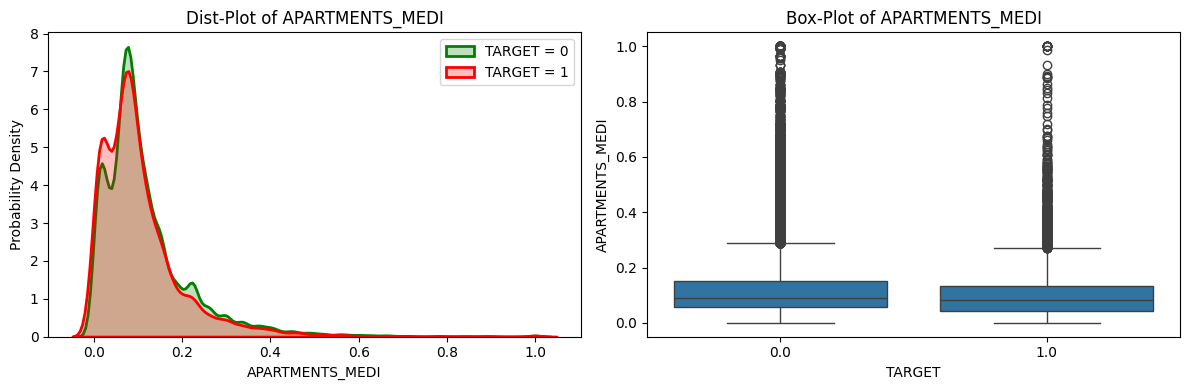

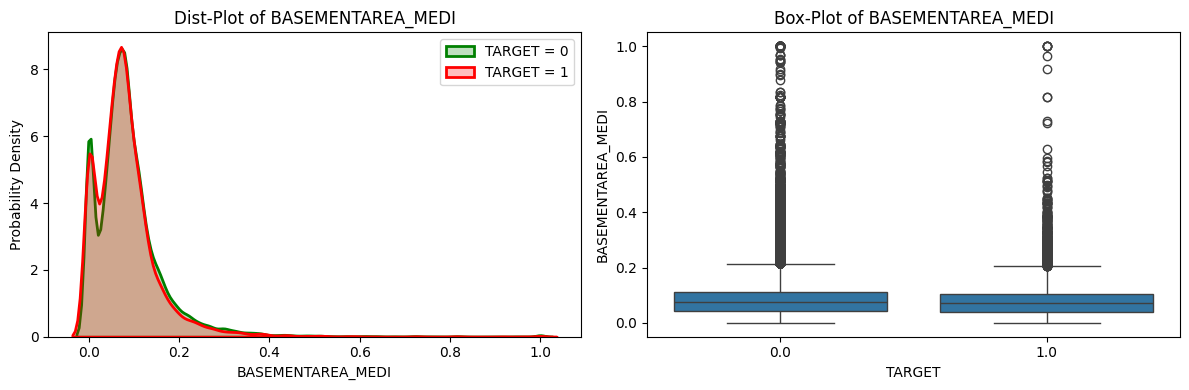

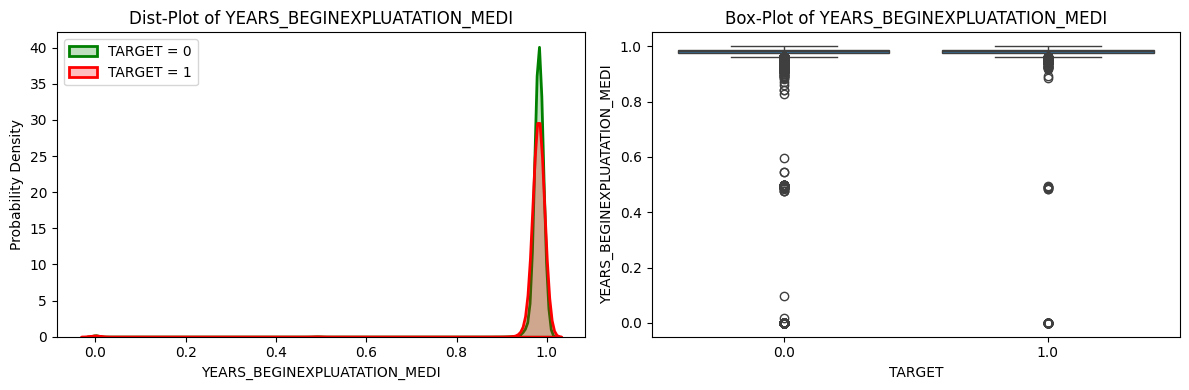

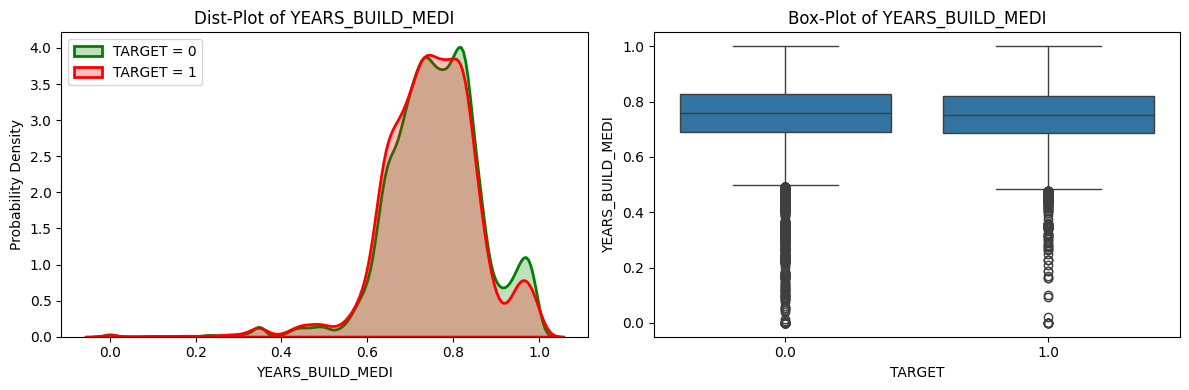

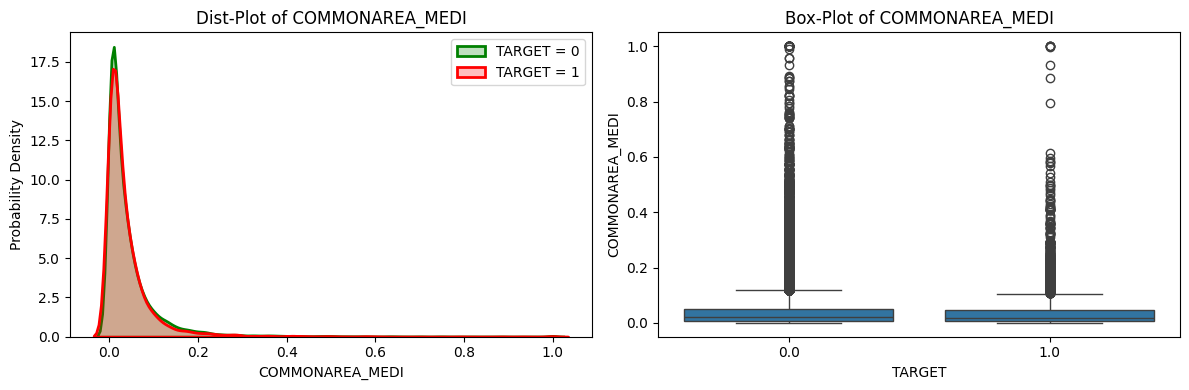

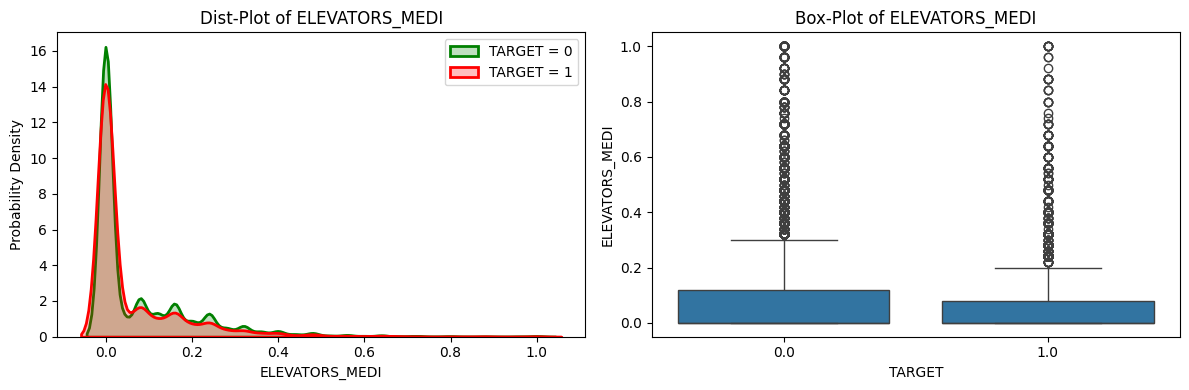

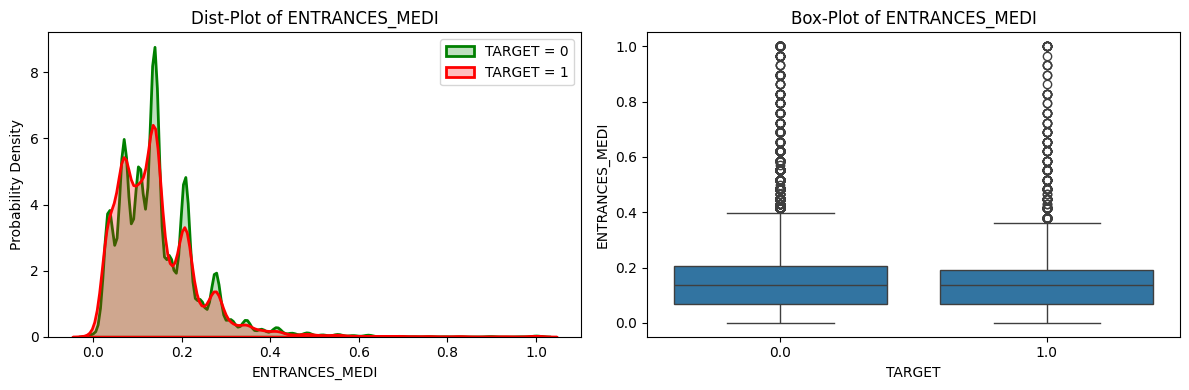

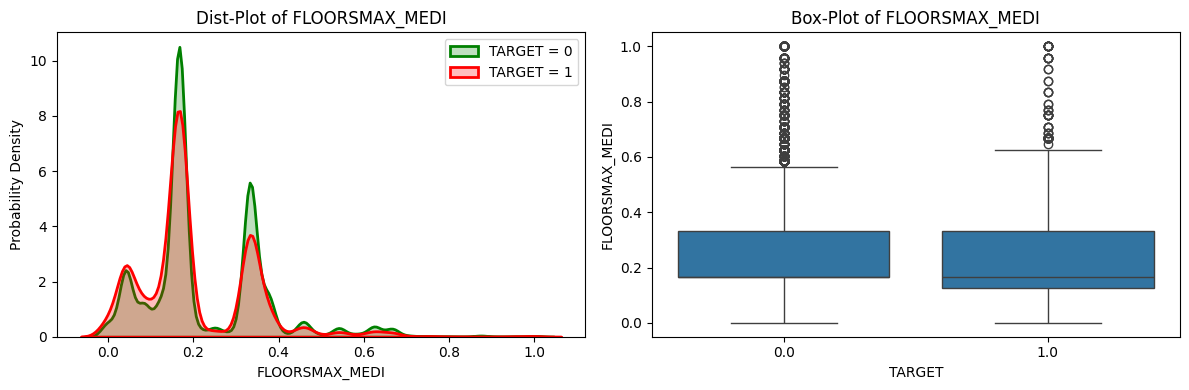

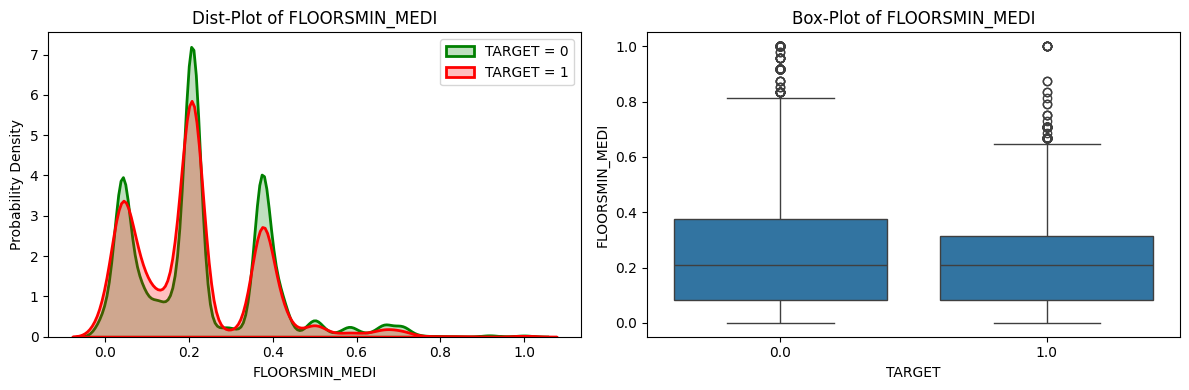

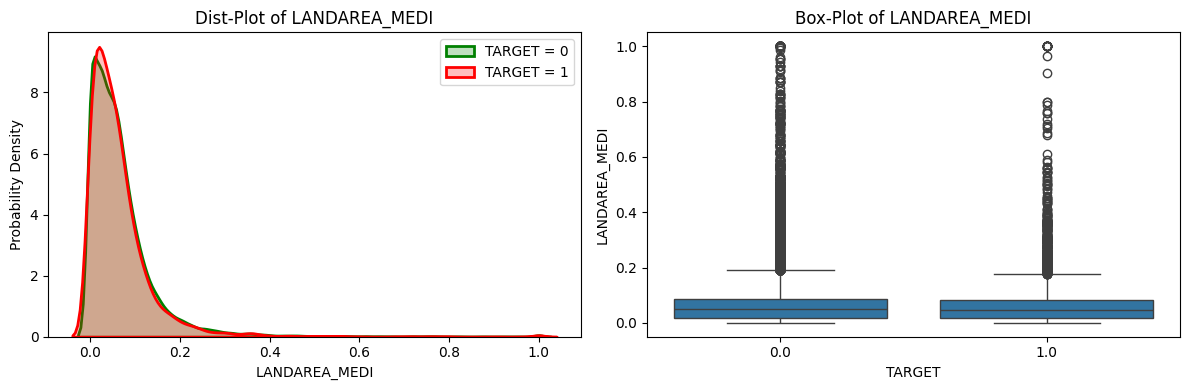

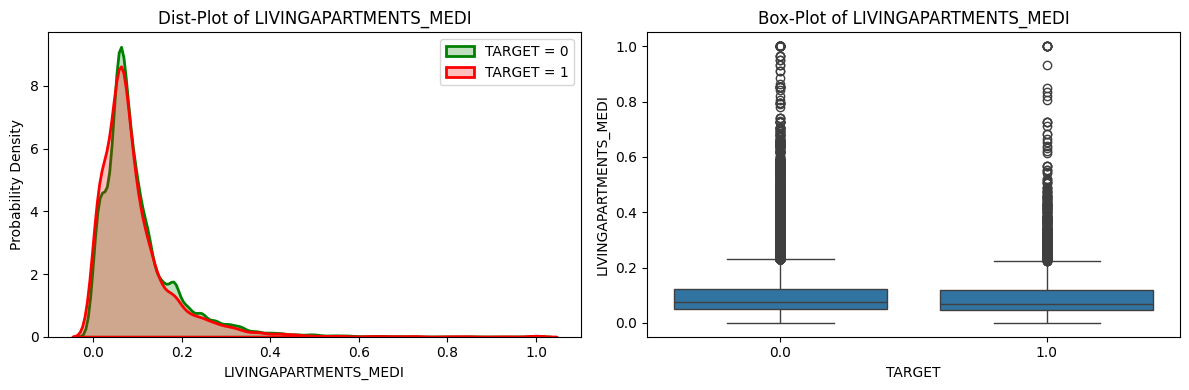

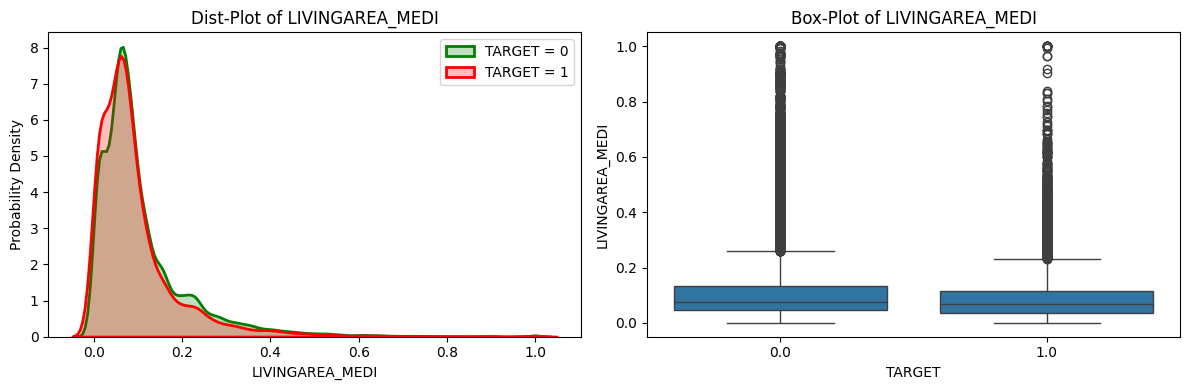

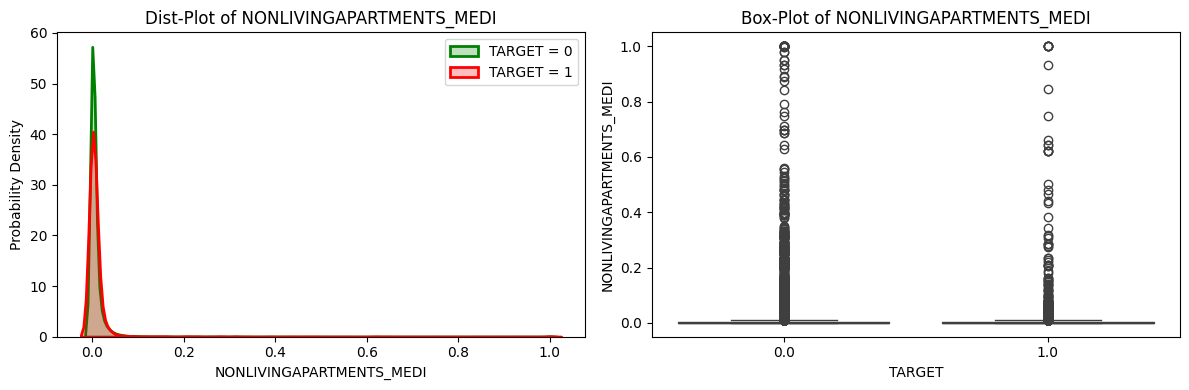

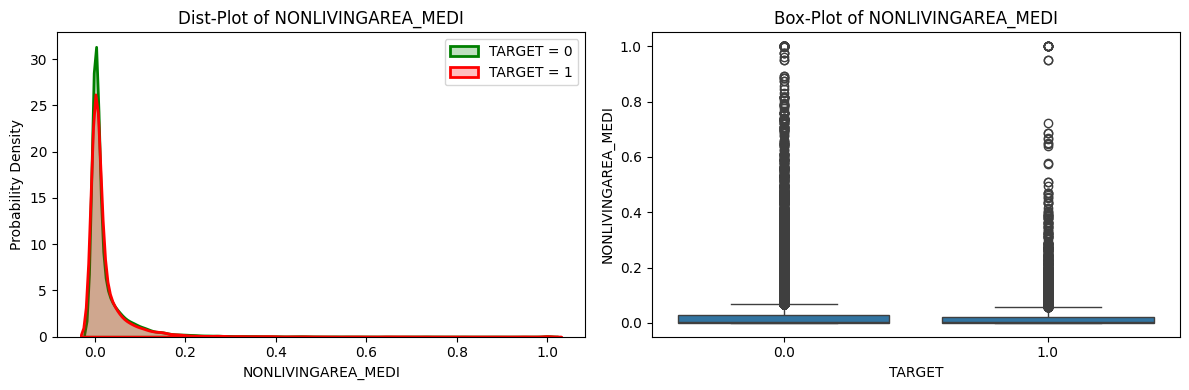

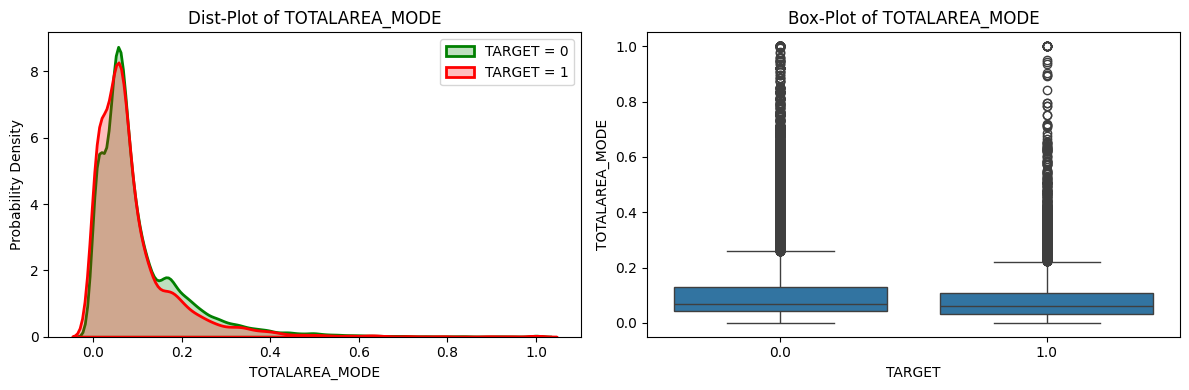

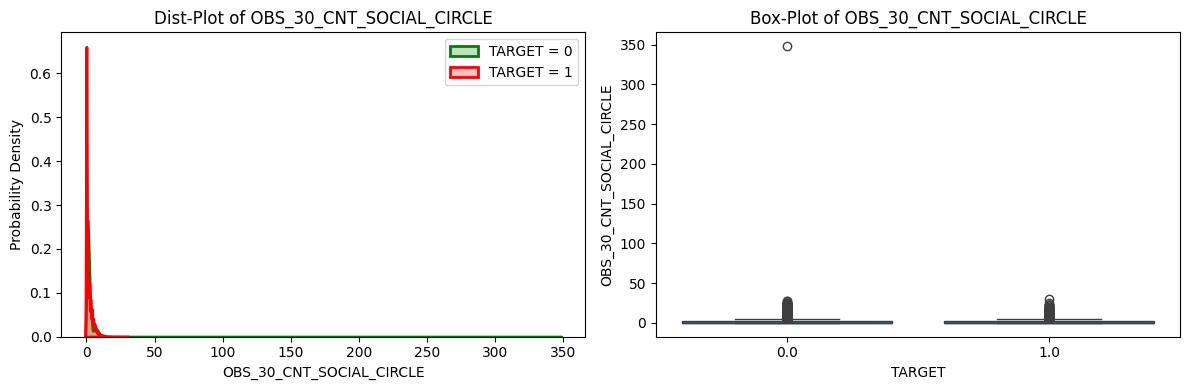

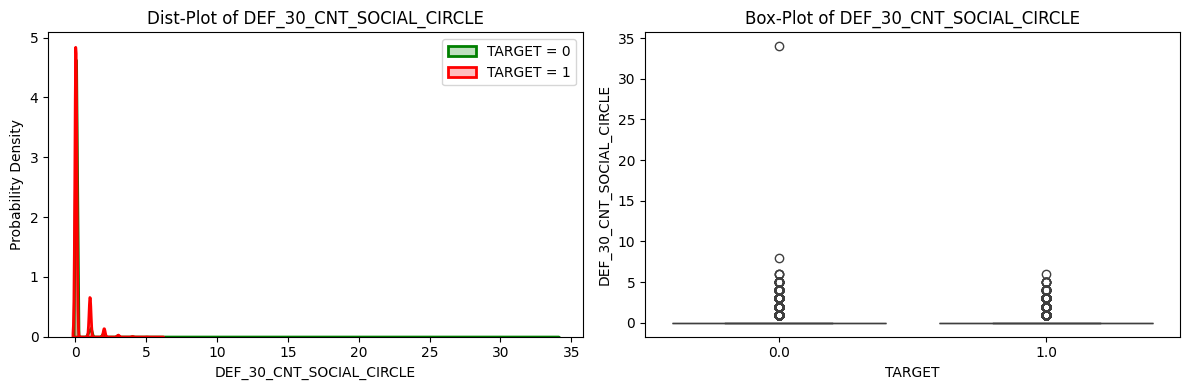

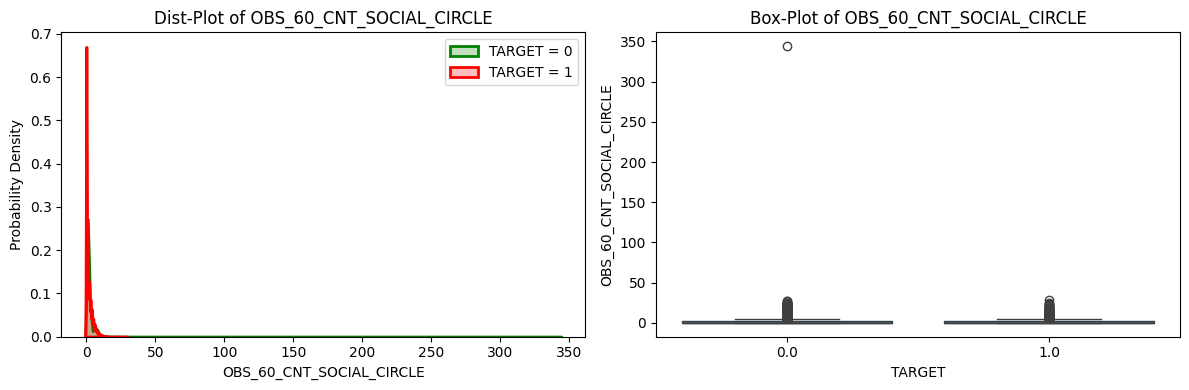

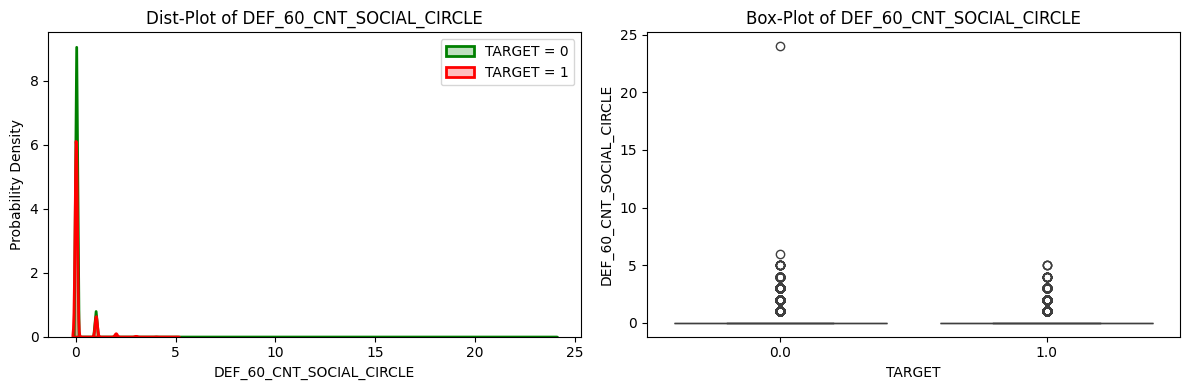

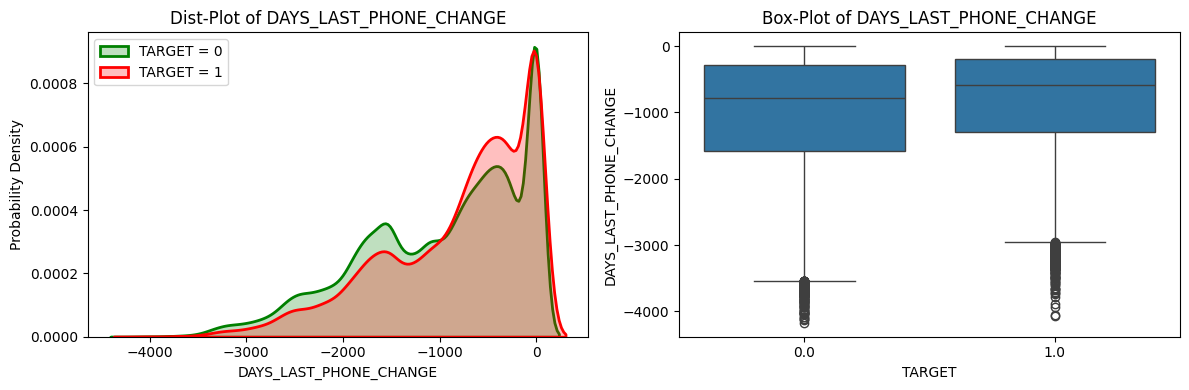

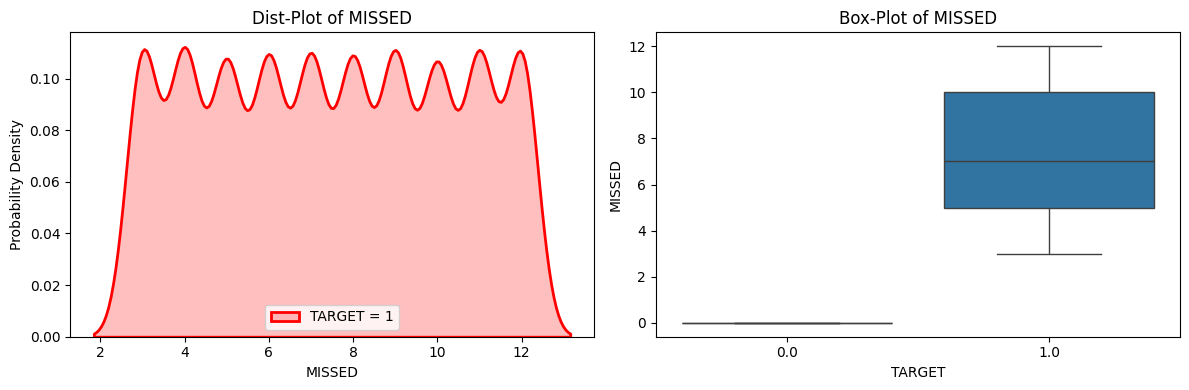

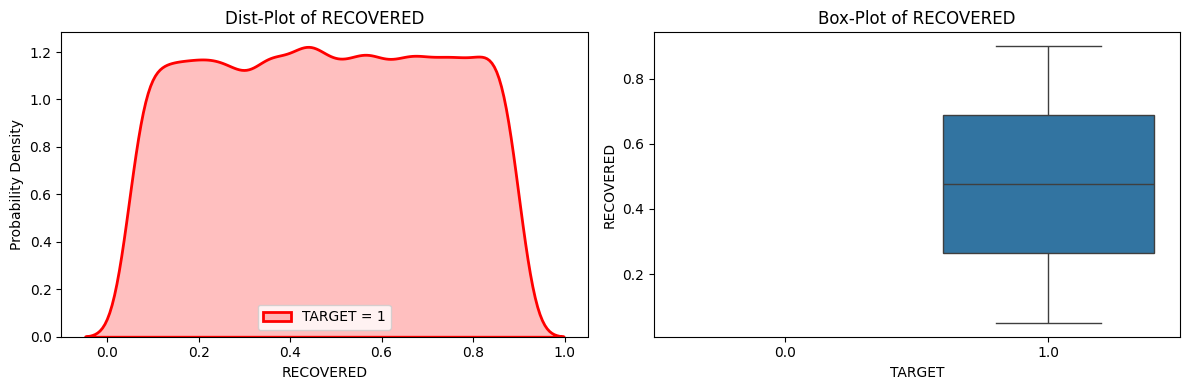

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# ensure TARGET is 0/1
# data['TARGET'].value_counts()

for col in numerical_cols:
    plt.figure(figsize=(12, 4))

    # ---------- KDE / distribution ----------
    plt.subplot(1, 2, 1)
    sns.kdeplot(
        data=data[data["TARGET"] == 0][col].dropna(),
        label="TARGET = 0",
        fill=True,
        color="green",
        linewidth=2
    )
    sns.kdeplot(
        data=data[data["TARGET"] == 1][col].dropna(),
        label="TARGET = 1",
        fill=True,
        color="red",
        linewidth=2
    )
    plt.xlabel(col)
    plt.ylabel("Probability Density")
    plt.title(f"Dist-Plot of {col}")
    plt.legend()

    # ---------- Boxplot ----------
    plt.subplot(1, 2, 2)
    sns.boxplot(
        data=data,
        x="TARGET",
        y=col
    )
    plt.title(f"Box-Plot of {col}")
    plt.tight_layout()
    plt.show()


In [84]:
corr_df = (
    data.corr(numeric_only=True)[["TARGET"]]
    .drop("TARGET")
    .rename(columns={"TARGET": "correlation_with_target"})
    .sort_values("correlation_with_target", key=lambda x: x.abs(), ascending=False)
)

corr_df.head(10)


correlation_with_target
MISSED                                      0.922376
DAYS_BIRTH                                  0.101925
REGION_RATING_CLIENT_W_CITY                 0.079490
REGION_RATING_CLIENT                        0.076383
DAYS_LAST_PHONE_CHANGE                      0.074119
DAYS_ID_PUBLISH                             0.067928
REG_CITY_NOT_WORK_CITY                      0.065945
FLAG_EMP_PHONE                              0.060935
DAYS_EMPLOYED                              -0.059527
FLOORSMAX_AVG                              -0.058609

In [85]:
import pandas as pd
import numpy as np

# correlation matrix (numeric only)
corr = data.corr(numeric_only=True)

# remove TARGET from rows + columns
corr = corr.drop(index="TARGET", columns="TARGET")

# turn matrix into long format
pairs = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))  # keep only upper triangle
        .stack()
        .reset_index()
        .rename(columns={"level_0": "feature_1", "level_1": "feature_2", 0: "correlation"})
)

# absolute value to rank by strength
pairs["abs_corr"] = pairs["correlation"].abs()

# sort by strongest correlations
pairs_sorted = pairs.sort_values("abs_corr", ascending=False)

pairs_sorted.head(10)


feature_1                     feature_2  correlation  \
592                 DAYS_EMPLOYED                FLAG_EMP_PHONE    -0.999734   
2963     OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE     0.998554   
1929              YEARS_BUILD_AVG              YEARS_BUILD_MEDI     0.998300   
2149                FLOORSMIN_AVG                FLOORSMIN_MEDI     0.997344   
2064                ENTRANCES_AVG                ENTRANCES_MEDI     0.996879   
2107                FLOORSMAX_AVG                FLOORSMAX_MEDI     0.996833   
2020                ELEVATORS_AVG                ELEVATORS_MEDI     0.996119   
1785               APARTMENTS_AVG               APARTMENTS_MEDI     0.995427   
1882  YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MEDI     0.995356   
1975               COMMONAREA_AVG               COMMONAREA_MEDI     0.995348   

      abs_corr  
592   0.999734  
2963  0.998554  
1929  0.998300  
2149  0.997344  
2064  0.996879  
2107  0.996833  
2020  0.996119  
1785  0.995427  
1882  0.995356  
1975  0.995348

In [86]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    table = pd.crosstab(x, y)
    chi2 = chi2_contingency(table, correction=False)[0]
    n = table.sum().sum()
    r, k = table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))


In [87]:
pairs = []

for i in range(len(categorical_cols)):
    for j in range(i + 1, len(categorical_cols)):
        col1 = categorical_cols[i]
        col2 = categorical_cols[j]
        v = cramers_v(data[col1], data[col2])
        pairs.append((col1, col2, v))

# convert to DataFrame
cramers_df = pd.DataFrame(pairs, columns=["feature_1", "feature_2", "cramers_v"])


In [88]:
cramers_df_sorted = cramers_df.sort_values("cramers_v", ascending=False)
cramers_df_sorted.head(10)


feature_1            feature_2  cramers_v
22           CODE_GENDER      OCCUPATION_TYPE   0.572644
70      NAME_INCOME_TYPE    ORGANIZATION_TYPE   0.422516
15           CODE_GENDER         FLAG_OWN_CAR   0.340839
119   WALLSMATERIAL_MODE  EMERGENCYSTATE_MODE   0.322640
100      OCCUPATION_TYPE    ORGANIZATION_TYPE   0.303417
35          FLAG_OWN_CAR      OCCUPATION_TYPE   0.265005
24           CODE_GENDER    ORGANIZATION_TYPE   0.239766
46       FLAG_OWN_REALTY    NAME_HOUSING_TYPE   0.229322
77   NAME_EDUCATION_TYPE      OCCUPATION_TYPE   0.219366
37          FLAG_OWN_CAR    ORGANIZATION_TYPE   0.198965

### A.5 Outlier Detection


In [89]:
# Check for outliers in key numerical features
print("=" * 60)
print("OUTLIER DETECTION")
print("=" * 60)

# Check DAYS_EMPLOYED (known to have negative values indicating unemployed)
print("\nDAYS_EMPLOYED Analysis:")
print(f"  Negative values (unemployed): {(data['DAYS_EMPLOYED'] < 0).sum():,}")
print(f"  Positive values: {(data['DAYS_EMPLOYED'] > 0).sum():,}")
print(f"  Min: {data['DAYS_EMPLOYED'].min()}")
print(f"  Max: {data['DAYS_EMPLOYED'].max()}")

# Check DAYS_BIRTH (should be negative, convert to age)
print("\nDAYS_BIRTH Analysis (Age in days, negative):")
print(f"  Min: {data['DAYS_BIRTH'].min()} days")
print(f"  Max: {data['DAYS_BIRTH'].max()} days")
print(f"  Age range: {abs(data['DAYS_BIRTH'].max()) / 365:.1f} to {abs(data['DAYS_BIRTH'].min()) / 365:.1f} years")

# Check for impossible values in key features
print("\nChecking for impossible/outlier values:")
print(f"  AMT_INCOME_TOTAL <= 0: {(data['AMT_INCOME_TOTAL'] <= 0).sum()}")
print(f"  AMT_CREDIT <= 0: {(data['AMT_CREDIT'] <= 0).sum()}")
print(f"  CNT_CHILDREN < 0: {(data['CNT_CHILDREN'] < 0).sum()}")

# IQR method for key numerical features
key_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
outlier_summary = []

for feature in key_features:
    if feature in data.columns:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((data[feature] < lower_bound) | (data[feature] > upper_bound)).sum()
        outlier_summary.append({
            'Feature': feature,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outliers': outliers,
            'Outlier %': (outliers / len(data)) * 100
        })

outlier_df = pd.DataFrame(outlier_summary)
print("\nOutlier Summary (IQR method):")
print(outlier_df)


OUTLIER DETECTION

DAYS_EMPLOYED Analysis:
  Negative values (unemployed): 130,904
  Positive values: 27,885
  Min: -17583
  Max: 365243

DAYS_BIRTH Analysis (Age in days, negative):
  Min: -25200 days
  Max: -7673 days
  Age range: 21.0 to 69.0 years

Checking for impossible/outlier values:
  AMT_INCOME_TOTAL <= 0: 0
  AMT_CREDIT <= 0: 0
  CNT_CHILDREN < 0: 0

Outlier Summary (IQR method):
            Feature  Lower Bound  Upper Bound  Outliers  Outlier %
0  AMT_INCOME_TOTAL    -22500.00    337500.00      7171   4.515999
1        AMT_CREDIT   -537975.00   1616625.00      3264   2.055532
2       AMT_ANNUITY    -10289.25     61512.75      3774   2.376709
3   AMT_GOODS_PRICE   -423000.00   1341000.00      7363   4.636913


## B. Convert the data into features

Now we'll perform feature engineering to prepare the data for machine learning models.


In [90]:
# Create a copy for feature engineering
data_processed = data.copy()

### B.1 Collum Specific


In [91]:
import numpy as np
import pandas as pd

# DAYS_BIRTH: convert days-negative to age in years (positive)
data_processed['DAYS_BIRTH'] = (-data_processed['DAYS_BIRTH'] / 365).round()

# DAYS_EMPLOYED: absolute values first (job seekers have negatives)
data_processed['DAYS_EMPLOYED'] = data_processed['DAYS_EMPLOYED'].abs()

# Create anomalous flag BEFORE replacing the anomaly
data_processed['DAYS_EMPLOYED_ANOM'] = data_processed['DAYS_EMPLOYED'] == 365243

# Replace anomalous 365243 with NaN (invalid employment length)
data_processed['DAYS_EMPLOYED'] = data_processed['DAYS_EMPLOYED'].replace(365243, np.nan)

# Convert to years (after cleaning)
data_processed['DAYS_EMPLOYED'] = data_processed['DAYS_EMPLOYED'] / 365

# Remove invalid gender rows
data_processed = data_processed[data_processed['CODE_GENDER'] != 'XNA']

# Remove extreme values in social circle
data_processed.loc[data_processed['OBS_30_CNT_SOCIAL_CIRCLE'] > 30, 'OBS_30_CNT_SOCIAL_CIRCLE'] = np.nan
data_processed.loc[data_processed['OBS_60_CNT_SOCIAL_CIRCLE'] > 30, 'OBS_60_CNT_SOCIAL_CIRCLE'] = np.nan

# Drop some problematic building mode columns
cols_to_drop = [
    "FONDKAPREMONT_MODE",
    "HOUSETYPE_MODE",
    "WALLSMATERIAL_MODE",
    "EMERGENCYSTATE_MODE"
]
cols_to_drop = [c for c in cols_to_drop if c in data_processed.columns]
data_processed = data_processed.drop(columns=cols_to_drop)
print("Dropped columns:", cols_to_drop)

# ============================================
# MEDIAN IMPUTATION FOR ALL NUMERIC COLUMNS
# ============================================

# select numeric columns directly from the dataframe
num_cols_existing = data_processed.select_dtypes(include=['number']).columns.tolist()

# optional: do not impute TARGET if you prefer
if 'TARGET' in num_cols_existing:
    num_cols_existing.remove('TARGET')

print(f"Median imputation on {len(num_cols_existing)} numerical columns.")
print("Columns:", num_cols_existing)

if num_cols_existing:
    # force numeric (defensive)
    data_processed[num_cols_existing] = data_processed[num_cols_existing].apply(
        pd.to_numeric, errors='coerce'
    )

    for col in num_cols_existing:
        median_val = data_processed[col].median()
        data_processed[col] = data_processed[col].fillna(median_val)

    # sanity check for DAYS_EMPLOYED
    print("NaNs in DAYS_EMPLOYED after imputation:",
          data_processed['DAYS_EMPLOYED'].isna().sum())
else:
    print("No numerical columns found for median imputation.")

# identify FLAG_ columns that exist
flag_cols = [c for c in data_processed.columns if c.startswith("FLAG_")]

# convert Y/N → 1/0 only where it applies
for col in flag_cols:
    unique_vals = set(data_processed[col].dropna().unique())
    if unique_vals <= {"Y", "N"}:     # column is Y/N-based
        data_processed[col] = data_processed[col].map({"Y": 1, "N": 0})



Dropped columns: ['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
Median imputation on 78 numerical columns.
Columns: ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', '

### B.2 Derived Features




In [92]:
print("=" * 60)
print("DERIVED FEATURES")
print("=" * 60)

# Credit-to-income ratio
data_processed['CREDIT_INCOME_RATIO'] = data_processed['AMT_CREDIT'] / (data_processed['AMT_INCOME_TOTAL'] + 1)
print(f"Credit-to-income ratio range: {data_processed['CREDIT_INCOME_RATIO'].min():.2f} to {data_processed['CREDIT_INCOME_RATIO'].max():.2f}")

# Annuity-to-income ratio
data_processed['ANNUITY_INCOME_RATIO'] = data_processed['AMT_ANNUITY'] / (data_processed['AMT_INCOME_TOTAL'] + 1)
print(f"Annuity-to-income ratio range: {data_processed['ANNUITY_INCOME_RATIO'].min():.2f} to {data_processed['ANNUITY_INCOME_RATIO'].max():.2f}")

# Credit-to-goods ratio
data_processed['CREDIT_GOODS_RATIO'] = data_processed['AMT_CREDIT'] / (data_processed['AMT_GOODS_PRICE'].replace(0, np.nan) + 1)
print(f"Credit-to-goods ratio range: {data_processed['CREDIT_GOODS_RATIO'].min():.2f} to {data_processed['CREDIT_GOODS_RATIO'].max():.2f}")

# Address consistency flags (combine region and city mismatches)
data_processed['ADDRESS_MISMATCH_REGION'] = (
    data_processed['REG_REGION_NOT_LIVE_REGION'] | 
    data_processed['REG_REGION_NOT_WORK_REGION'] | 
    data_processed['LIVE_REGION_NOT_WORK_REGION']
).astype(int)

data_processed['ADDRESS_MISMATCH_CITY'] = (
    data_processed['REG_CITY_NOT_LIVE_CITY'] | 
    data_processed['REG_CITY_NOT_WORK_CITY'] | 
    data_processed['LIVE_CITY_NOT_WORK_CITY']
).astype(int)

print(f"Address region mismatches: {data_processed['ADDRESS_MISMATCH_REGION'].sum():,}")
print(f"Address city mismatches: {data_processed['ADDRESS_MISMATCH_CITY'].sum():,}")

print("\nDerived features created successfully!")

data_processed = data_processed.drop(columns=['OWN_CAR_AGE'])

data_processed['EMPLOYED_AGE_RATIO'] = data_processed['DAYS_EMPLOYED'] / data_processed['DAYS_BIRTH']




DERIVED FEATURES
Credit-to-income ratio range: 0.00 to 84.73
Annuity-to-income ratio range: 0.00 to 1.88
Credit-to-goods ratio range: 0.15 to 6.00
Address region mismatches: 8,565
Address city mismatches: 39,135

Derived features created successfully!


### B.3 Categorical Encoding Preparation

We'll identify which categorical features need encoding and prepare them for the encoding process.


In [93]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.preprocessing import FunctionTransformer

edu_order = { 'Lower secondary': 0, 'Secondary / secondary special': 1, 'Incomplete higher': 2, 'Higher education': 3, 'Academic degree': 4 }

data_processed['NAME_EDUCATION_TYPE_ORD'] = data_processed['NAME_EDUCATION_TYPE'].map(edu_order)

data_processed = data_processed.drop(columns=['NAME_EDUCATION_TYPE'])

oh_encoded = [
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER', 
    'NAME_TYPE_SUITE', 
    'NAME_INCOME_TYPE', 
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE', 
    'OCCUPATION_TYPE', 
    'WEEKDAY_APPR_PROCESS_START', 
    'ORGANIZATION_TYPE',
]

# Impute UNK directly in the dataframe
existing_oh_cols = [c for c in oh_encoded if c in data_processed.columns]
data_processed[existing_oh_cols] = data_processed[existing_oh_cols].fillna("UNK")

onehot_pipeline = ColumnTransformer(
    transformers=[
        ('cat_ohe',
         OneHotEncoder(drop='first', handle_unknown='ignore'),
         existing_oh_cols)
    ],
    remainder='passthrough'
)
# Drop the original categorical columns that will be one-hot encoded
data_processed = data_processed.drop(columns=existing_oh_cols)


In [94]:
data_processed['DAYS_EMPLOYED'].isna().sum()



np.int64(0)

### B.4 Building Features Aggregation

Many building features have multiple variants (_AVG, _MODE, _MEDI). We'll analyze and potentially aggregate them.


In [95]:
print("=" * 60)
print("BUILDING FEATURES – KEEPING ORIGINALS WITH MEDIAN IMPUTATION")
print("=" * 60)

# Base feature names (before _AVG/_MODE/_MEDI)
base_features = [
    "APARTMENTS",
    "BASEMENTAREA",
    "YEARS_BEGINEXPLUATATION",
    "YEARS_BUILD",
    "COMMONAREA",
    "ELEVATORS",
    "ENTRANCES",
    "FLOORSMAX",
    "FLOORSMIN",
    "LANDAREA",
    "LIVINGAPARTMENTS",
    "LIVINGAREA",
    "NONLIVINGAPARTMENTS",
    "NONLIVINGAREA",
]

# 1. Identify all *_AVG / *_MODE / *_MEDI columns to keep
building_cols = []

for feature in base_features:
    for suffix in ["_AVG", "_MODE", "_MEDI"]:
        col = f"{feature}_{suffix}"
        if col in data_processed.columns:
            building_cols.append(col)

print(f"Total building columns kept: {len(building_cols)}")

# 2. Median impute all building columns (robust to non-numeric dtypes)
non_numeric_building = []

for col in building_cols:
    # force numeric; anything non-numeric becomes NaN
    s = pd.to_numeric(data_processed[col], errors='coerce')

    if not s.notna().any():
        # column is all NaN or non-convertible
        non_numeric_building.append(col)
        # keep as float column of NaNs
        data_processed[col] = s
        continue

    median_value = s.median()
    data_processed[col] = s.fillna(median_value)

print("Finished median imputation for building columns.")
if non_numeric_building:
    print("Columns that were entirely non-numeric / NaN:", non_numeric_building)


BUILDING FEATURES – KEEPING ORIGINALS WITH MEDIAN IMPUTATION
Total building columns kept: 0
Finished median imputation for building columns.


## C. Feature Selection and Data Leakage Prevention

Now we'll identify features that may leak information and create separate datasets for Task 2 (Classification) and Task 3 (Segmentation).


### C.1 Identify Data Leakage Features


In [96]:
print("=" * 60)
print("DATA LEAKAGE IDENTIFICATION")
print("=" * 60)

# Features that are definitely data leakage (not available at application time)
leakage_features = [
    'MISSED',       # Payment history - not available at application
    'RECOVERED',    # Recovery information - post-default
]

print("Definite leakage features (will be excluded):")
for feat in leakage_features:
    if feat in data_processed.columns:
        print(f"  - {feat}:")
        print(data_processed[feat].describe())

# Count how many will actually be removed
num_leakage = sum(1 for f in leakage_features if f in data_processed.columns)
print(f"\nTotal features to exclude due to leakage: {num_leakage}")

# Remove ONLY the definite leakage features
data_processed = data_processed.drop(columns=[f for f in leakage_features if f in data_processed.columns])


DATA LEAKAGE IDENTIFICATION
Definite leakage features (will be excluded):
  - MISSED:
count    158790.000000
mean          1.123944
std           2.900730
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.000000
Name: MISSED, dtype: float64
  - RECOVERED:
count    158790.000000
mean          0.475645
std           0.095023
min           0.050027
25%           0.475489
50%           0.475489
75%           0.475489
max           0.899869
Name: RECOVERED, dtype: float64

Total features to exclude due to leakage: 2


### C.2 Prepare Data for Task 2 (Classification)

For classification, we need features available at application time only.


In [97]:
# Prepare data for Task 2 (Classification)
print("=" * 60)
print("PREPARING DATA FOR TASK 2 (CLASSIFICATION)")
print("=" * 60)

task2_data = data_processed

# Keep TARGET for classification
print(f"Initial columns for Task 2: {task2_data.shape[1]}")

# Handle missing values - we'll use a strategy that preserves the data structure
# For now, we'll keep all columns and handle missing values during modeling
# But we can drop columns with extremely high missing rates (>90%)

high_missing_cols = task2_data.columns[task2_data.isnull().sum() / len(task2_data) > 0.90].tolist()
print(f"\nColumns with >90% missing values (will be dropped): {len(high_missing_cols)}")
if len(high_missing_cols) > 0:
    print(f"  Examples: {high_missing_cols[:5]}")

task2_data = task2_data.drop(columns=high_missing_cols)
print(f"\nFinal columns for Task 2: {task2_data.shape[1]}")

# Save Task 2 data
task2_output_path = '/home/renato/Documents/Mestrado/ML4Finance/Projeto Grupo/Group Project-20251220/task2_classification_data.csv'
task2_data.to_csv(task2_output_path, index=False)
print(f"\nTask 2 data saved to: {task2_output_path}")
print(f"Shape: {task2_data.shape}")


PREPARING DATA FOR TASK 2 (CLASSIFICATION)
Initial columns for Task 2: 86

Columns with >90% missing values (will be dropped): 0

Final columns for Task 2: 86

Task 2 data saved to: /home/renato/Documents/Mestrado/ML4Finance/Projeto Grupo/Group Project-20251220/task2_classification_data.csv
Shape: (158790, 86)


### C.3 Prepare Data for Task 3 (Segmentation)

For segmentation, we may use different features. We'll exclude TARGET and focus on customer characteristics.


In [98]:
# Prepare data for Task 3 (Segmentation)
print("=" * 60)
print("PREPARING DATA FOR TASK 3 (SEGMENTATION)")
print("=" * 60)

# For segmentation, we don't need TARGET (unsupervised learning)
# We'll focus on customer characteristics
task3_data = task2_data.drop(columns=['TARGET', 'SK_ID_CURR'])

# For segmentation, we might want to remove highly correlated features
# and focus on distinct customer characteristics
# We'll also remove some features that might not be useful for segmentation

# Remove ID-like features that don't represent customer characteristics
id_like_features = ['SK_ID_CURR']
task3_data = task3_data.drop(columns=[f for f in id_like_features if f in task3_data.columns])

print(f"Columns for Task 3: {task3_data.shape[1]}")

# Save Task 3 data
task3_output_path = '/home/renato/Documents/Mestrado/ML4Finance/Projeto Grupo/Group Project-20251220/task3_segmentation_data.csv'
task3_data.to_csv(task3_output_path, index=False)
print(f"\nTask 3 data saved to: {task3_output_path}")
print(f"Shape: {task3_data.shape}")


PREPARING DATA FOR TASK 3 (SEGMENTATION)
Columns for Task 3: 84

Task 3 data saved to: /home/renato/Documents/Mestrado/ML4Finance/Projeto Grupo/Group Project-20251220/task3_segmentation_data.csv
Shape: (158790, 84)


### Summary of Data Files Created

The following data files have been created for the remaining tasks:

1. **task2_classification_data.csv**: Contains features and TARGET variable for classification modeling
   - Excludes data leakage features (MISSED, RECOVERED, social circle default counts)
   - Includes all engineered features
   - Ready for supervised learning

2. **task3_segmentation_data.csv**: Contains customer features for unsupervised segmentation
   - Excludes TARGET variable (unsupervised learning)
   - Excludes ID columns
   - Focuses on customer characteristics for clustering

Both datasets are cleaned and ready for use in their respective tasks.


#### B.	Convert the data into features.


#### C.	Decide or create the features you will use for each task.

There are two tasks, they may require different data. All features might not be useful or relevant or may leak data. For each feature think, would this be available at the time the machine learning model needs to be applied. Warning if your metrics like recall on charge off are very high, you may be leaking data.

At the end of these cells you should write all the data files you need for the remaing tasks.